In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Union,List,Tuple

In [4]:
sim = pd.read_csv("/data/yash/Encoder-Evaluation/llm_results/simcse/anto/anto_mrpc.csv")

In [5]:
sim

,Unnamed: 0,original_sentence,paraphrased,antonym,sim_org_para,sim_org_anto,diff_org_para
0,0,"Amrozi accused his brother , whom he called "" ...","Referring to him as only "" the witness "" , Amr...","Amrozi accused his sister , whom he called "" t...",0.936114,0.938066,-0.001952
1,1,They had published an advertisement on the Int...,"On June 10 , the ship 's owners had published ...",They had published an advertisement on the Int...,0.855047,0.970345,-0.115298
2,2,"The stock rose $ 2.11 , or about 11 percent , ...",PG & E Corp. shares jumped $ 1.63 or 8 percent...,"The stock rose $ 2.11 , or about 11 percent , ...",0.761469,0.991582,-0.230113
3,3,Revenue in the first quarter of the year dropp...,With the scandal hanging over Stewart 's compa...,Revenue in the first quarter of the year atten...,0.813642,0.813182,0.000460
4,4,The DVD-CCA then appealed to the state Supreme...,The DVD CCA appealed that decision to the U.S....,The DVD-CCA then repel to the state Supreme Co...,0.880326,0.875111,0.005215
...,...,...,...,...,...,...,...
2469,2469,Knox County Health Department is following nat...,The health department spokesperson added the d...,Knox County illness Department is following na...,0.707364,0.988976,-0.281612
2470,2470,The new rules will allow a single company to o...,The changed national ownership limit allows a ...,The old rules will allow a single company to o...,0.917704,0.983778,-0.066074
2471,2471,""" At this point , Mr. Brando announced : ' Som...","Brando said that "" somebody ought to put a bul...",""" At this unpointedness , Mr. Brando announced...",0.644742,0.981573,-0.336831
2472,2472,""" We have concluded that the outlook for price...","In a statement , the ECB said the outlook for ...",""" We have concluded that the outlook for price...",0.826647,0.981121,-0.154473


In [7]:
data= pd.read_csv("/data/yash/Encoder-Evaluation/llm_results/all_llm_models_anto_diff.csv")
# ll_m = pd.read_csv("../llm_results/antonym_results/llama2_anto_mrpc.csv")
# ll_q = pd.read_csv("../llm_results/antonym_results/llama2_anto_qqp.csv")
# ll_p = pd.read_csv("../llm_results/antonym_results/llama2_anto_paw.csv")
# data["llama_anto_mrpc_diff"] = ll_m["diff_org_para"]
# data["llama_anto_qqp_diff"] = ll_q["diff_org_para"]
# data["llama_anto_paw_diff"] = ll_p["diff_org_para"]

In [8]:
data.head(2)

,Unnamed: 0.1,Unnamed: 0,bloom_anto_mrpc_diff,blom_anto_paw_diff,bloom_anto_qqp_diff,chat_anto_paw_diff,chat_anto_qqp_diff,gptneo_anto_mrpc_diff,gptneo_anto_paw_diff,gptneo_anto_qqp_diff,chat_anto_mrpc_diff,llama_anto_mrpc_diff,llama_anto_qqp_diff,llama_anto_paw_diff
0,0,0,-0.001824,0.000814,0.000580,0.012736,0.014223,-0.071969,0.039794,0.008848,-0.010683,-0.086257,0.050771,0.206611
1,1,1,-0.000083,0.000422,-0.000462,0.020710,0.021537,-0.024973,0.044058,0.013227,-0.048277,-0.081259,0.076832,0.070502


In [10]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'bloom_anto_mrpc_diff',
       'blom_anto_paw_diff', 'bloom_anto_qqp_diff', 'chat_anto_paw_diff',
       'chat_anto_qqp_diff', 'gptneo_anto_mrpc_diff', 'gptneo_anto_paw_diff',
       'gptneo_anto_qqp_diff', 'chat_anto_mrpc_diff', 'llama_anto_mrpc_diff',
       'llama_anto_qqp_diff', 'llama_anto_paw_diff'],
      dtype='object')

In [58]:
# data.to_csv("/home/yash/Probing-Sentence-Encoder/llm_results/all_llm_models_anto_diff.csv")

In [4]:
eps_cl=[-0.5,-0.3,-0.2,-0.15,-0.1,-0.05,0,0.05,0.1,0.2,0.3,0.5]
# eps = [-0.3,-0.25,-0.15,-0.1,-0.08,-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.1,0.15,0.2,0.3,0.4]
eps = [-0.3,-0.15,-0.1,-0.04,-0.01,0,0.01,0.02,0.04,0.08,0.1,0.3,0.6]

bins = [f'{eps[i]} to {eps[i+1]}' for i in range(len(eps)-1)]
bins_cl = [f'{eps_cl[i]} to {eps_cl[i+1]}' for i in range(len(eps_cl)-1)]


In [5]:
def collect_counts(data,eps):
    counts,_ = np.histogram(data,bins=eps)
    return counts

In [101]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [86]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

/tmp/ipykernel_1201302/4291788097.py:3: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [45]:



def plot_counts_check(data,task="",n=1,model_type="Classic",save=False):
    # plt.figure(figsize=(40,40))
    fontsize= 30
    data_name = task.split("_")[1]
    task_name = task.split("_")[0]
    plt.rcParams["figure.figsize"] = [18,12]
    data.plot.bar(width=0.7)
    plt.xticks(rotation=45,fontsize=fontsize,fontweight='bold')
    plt.yticks(fontsize=fontsize,fontweight='bold')
    plt.ylabel("# of samples",fontsize=fontsize,fontweight='bold')
    if task_name == "Jumbling":
        plt.xlabel(r"$\mathbf{\epsilon_{2}}$",fontsize=35,fontweight='bold')
    elif task_name =="Antonyms":
        plt.xlabel(r"$\mathbf{\epsilon_{1}}$",fontsize=35,fontweight='bold')
        
    # if task_name == "anto":
    #     plt.title(f"LLM Models {task_name} Replacement on {data_name}",fontsize=35)
    # elif task_name == "Jumbling" or "jumbling":
    #     plt.title(f"LLM Models - Sentence {task_name} on {data_name} (n={n})",fontsize=30)  
    # else:
    #     plt.title(f"{model_type} Models {task_name} Replacement on {data_name} (n={n})",fontsize=35)
    plt.tight_layout()
    plt.legend(fontsize=fontsize)
    # plt.show()
    if save:
        plt.savefig(f"/home/yash/Probing-Sentence-Encoder/save_plots/llm_{data_name}_{task_name}_{n}.pdf",bbox_inches='tight')

In [220]:
x=((2,3),(3,4))
x

((2, 3), (3, 4))

In [1]:
from brokenaxes import brokenaxes
from numpy import indices

def plot_counts(data,task="",n=1,model_type="Classic",break_range=Tuple[Tuple[int, int], Tuple[int, int]],save=False):
    
    N= len(data.columns)
    fontsize= 20
    width = 0.18
    data_name = task.split("_")[1]
    task_name = task.split("_")[0]
    
    fig = plt.figure(figsize=(20, 12))
    bax = brokenaxes(ylims=break_range,hspace=0.05)

    indices = np.arange(len(data.index))
    # indices = np.array(data.index)
    for idx, col in enumerate(data.columns):
        bax.bar(indices + (idx*width), data[col].values, width=width, label=col)
        # centered_indices = indices + idx*width   # center the x-ticks
        # bax.set_xticks(centered_indices)
        
#         colors = ['b', 'g', 'r', 'c', 'm']
# for idx, col in enumerate(df.columns):
#     bax.plot(df.index, df[col], label=col, color=colors[idx])


    bax.set_xticklabels(data.index,rotation=45,ha='right',fontsize=fontsize)
    centered_indices = indices+width # center the x-ticks
    bax.set_xticks(centered_indices)
    
    # plt.xticks(rotation=45,fontsize=fontsize)
    # bax.set_yticks(fontsize=fontsize)
    count=0
    for spine in bax.axs[0].spines.values():
        if count ==2 :
            count+=1
            spine.set_visible(False)
        else:
            spine.set_visible(True)
            count+=1
    count1=0
    for spine in bax.axs[1].spines.values():
        if count1 ==3 :
            count1+=1
            spine.set_visible(False)
        else:
            spine.set_visible(True)
            count1+=1
    
    # Add cut-out lines on both sides of the y-axis
    # You can adjust these positions and lengths as needed
    d = .015  # how big to make the diagonal lines in axes coordinates
    kwargs = dict(transform=bax.axs[0].transAxes, color='k', clip_on=False)
    # bax.axs[0].plot((-d, +d), (-d*2, +d*2), **kwargs)  # top-left diagonal
    bax.axs[0].plot((1 - d, 1 + d), (-d*2, +d*2), **kwargs)  # top-right diagonal

    kwargs.update(transform=bax.axs[1].transAxes)  # switch to the bottom axes
    # bax.axs[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    bax.axs[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    
    # plt.ylabel("# of samples",fontsize=fontsize)
    if task_name == "anto":
        plt.title(f"LLM Models {task_name} Replacement on {data_name}",fontsize=fontsize)
    elif task_name == "Jumbling" or "jumbling":
        plt.title(f"LLM Models - Sentence {task_name} on {data_name} (n={n})",fontsize=fontsize)  
    else:
        plt.title(f"{model_type} Models {task_name} Replacement on {data_name} (n={n})",fontsize=fontsize)
    # plt.tight_layout()
    # plt.show()
    if save:
        plt.savefig(f"/home/yash/Probing-Sentence-Encoder/save_plots/llm_{data_name}_{task_name}_{n}.pdf")
    bax.legend()
    plt.show()

NameError: name 'Tuple' is not defined

# LLM Models

## Antonyms

### QQP dataset

In [6]:
qqp_anto_counts = dict(
# Bloom model
# 
Bloom = np.hstack([[data[(data.bloom_anto_qqp_diff>=eps[i]) & (data.bloom_anto_qqp_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
# bloom_paw =np.hstack([[data[(data.bloom_anto_qqp_diff>=eps[i]) & (data.bloom_anto_qqp_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),

# gpt3.5 model
# 
GPT3 = np.hstack([[data[(data.chat_anto_qqp_diff>=eps[i]) & (data.chat_anto_qqp_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
# # chat_paw_count = np.hstack([[data[(data.chat_anto_qqp_diff>=eps[i]) & (data.chat_anto_qqp_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),

#gptneo 
# 
GPTNeo = np.hstack([[data[(data.gptneo_anto_qqp_diff>=eps[i]) & (data.gptneo_anto_qqp_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
# # gptneo_paw_count = np.hstack([[data[(data.gptneo_anto_qqp_diff>=eps[i]) & (data.gptneo_anto_qqp_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)])
Llama2 = np.hstack([[data[(data.llama_anto_qqp_diff>=eps[i]) & (data.llama_anto_qqp_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),

)


df_anto_qqp_counts = pd.DataFrame(qqp_anto_counts,index= eps[1:])

In [123]:
# df_anto_qqp_counts.to_csv("anto_text.csv")

In [144]:
len(np.array(df_anto_qqp_counts.index))

23

In [223]:
df_anto_qqp_counts

,Bloom,GPT3,GPTNeo,Llama2
-0.15,0,2,22,201
-0.10,0,30,67,239
-0.04,4,586,530,474
-0.01,27,621,694,259
0.00,1545,228,255,84
0.01,893,224,209,78
0.02,4,210,171,84
0.04,0,313,244,161
0.08,0,229,221,237
0.10,0,23,33,87


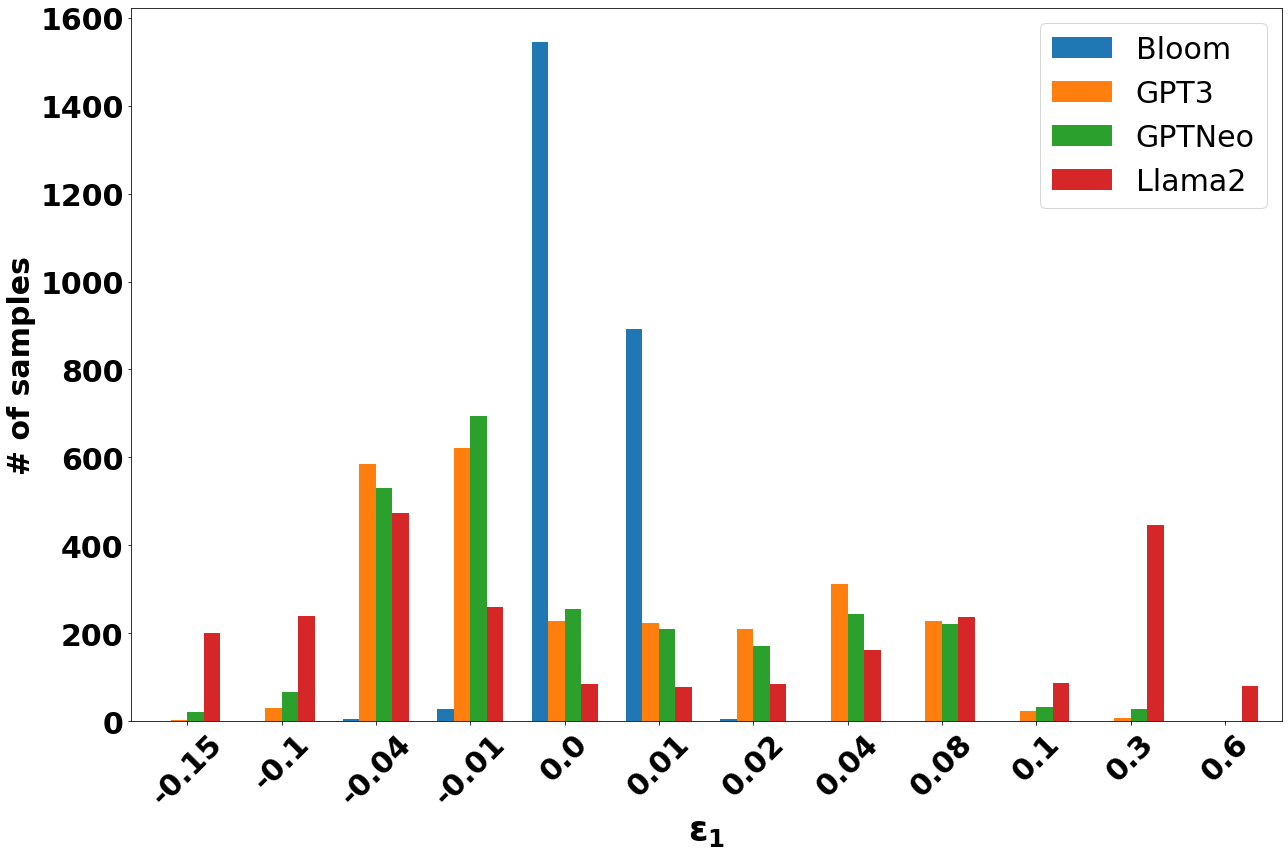

In [16]:
plot_counts_check(df_anto_qqp_counts,task="Antonyms_QQP",model_type="LLM",save=True)

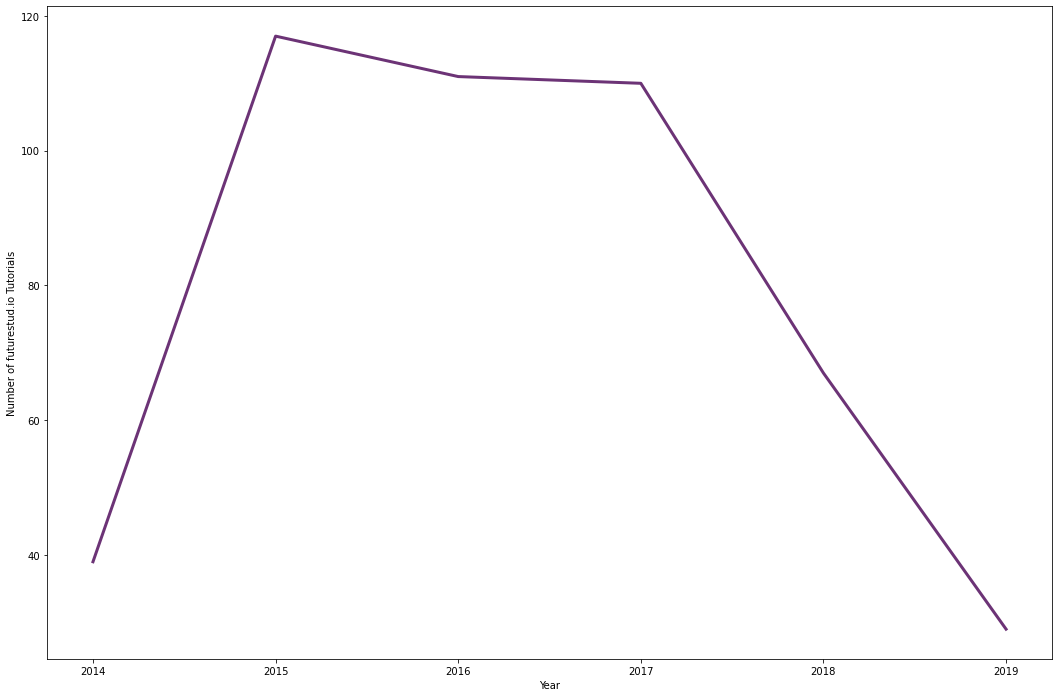

In [9]:
year = [2014, 2015, 2016, 2017, 2018, 2019] 
tutorial_count = [39, 117, 111, 110, 67, 29]
plt.plot(year, tutorial_count, color="#6c3376", linewidth=3)  
plt.xlabel('Year')  
plt.ylabel('Number of futurestud.io Tutorials')  
plt.savefig('./line_plot.pdf')

In [212]:
# imports
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots

# data
# df = pd.DataFrame({'years': [1995, 1996, 1997, 1998, 1999, 2000,
#                              2001, 2002, 2003, 2004, 2005, 2006,
#                              2007, 2008, 2009, 2010, 2011, 2012],
#                   'China': [219, 146, 112, 127, 124, 180, 236,
#                             207, 236, 263,350, 430, 474, 1526,
#                             488, 537, 500, 439],
#                   'Rest of world': [16, 13, 10, 11, 28, 37,
#                                         43, 55, 56, 88, 105, 156, 270,
#                                         299, 340, 403, 549, 1499]})
# df.set_index('years', inplace = True)
df = df_anto_qqp_counts

# colors and cut-offs
colors = px.colors.qualitative.Plotly
cut_interval = [600, 1400]
# bar_width=0.003
# subplot setup
fig = make_subplots(rows=2, cols=1, vertical_spacing = 0.04)
fig.update_layout(title = "USA plastic scrap exports (...with some made-up values)")

# Traces for [2, 1]
# marker_color=colors[i] ensures that categories follow the same color cycle
for i, col in enumerate(df.columns):
    fig.add_trace(go.Bar(x=df.index,
                    y=df[col],
                    name=col,
                    marker_color=colors[i],
                    legendgroup = col,
                    
                    ), row=2, col=1)

# Traces for [1, 1]
# Notice that showlegend = False.
# Since legendgroup = col the interactivity is
# taken care of in the previous for-loop.
for i, col in enumerate(df.columns):
    fig.add_trace(go.Bar(x=df.index,
                    y=df[col],
                    name=col,
                    marker_color=colors[i],
                    legendgroup = col,
                    showlegend = False,
                   
                    ), row=1, col=1)

# Some aesthetical adjustments to layout
fig.update_yaxes(range=[cut_interval[1], max(df.max()*1.1)], row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_yaxes(range=[0, cut_interval[0]], row=2, col=1)

fig.show()

In [204]:
df.index

Float64Index([-0.25, -0.15,  -0.1, -0.08, -0.06, -0.05, -0.04, -0.03, -0.02,
              -0.01,   0.0,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.08,
                0.1,  0.15,   0.2,   0.3,   0.4],
             dtype='float64')

In [202]:
df_anto_qqp_counts

,Bloom,GPT3,GPTNeo,Llama2
-0.25,0,0,0,27
-0.15,0,2,22,174
-0.10,0,30,67,239
-0.08,1,73,85,143
-0.06,2,189,164,167
-0.05,1,146,129,80
-0.04,0,178,152,84
-0.03,1,179,196,98
-0.02,2,210,251,86
-0.01,24,232,247,75


### MRPC dataset

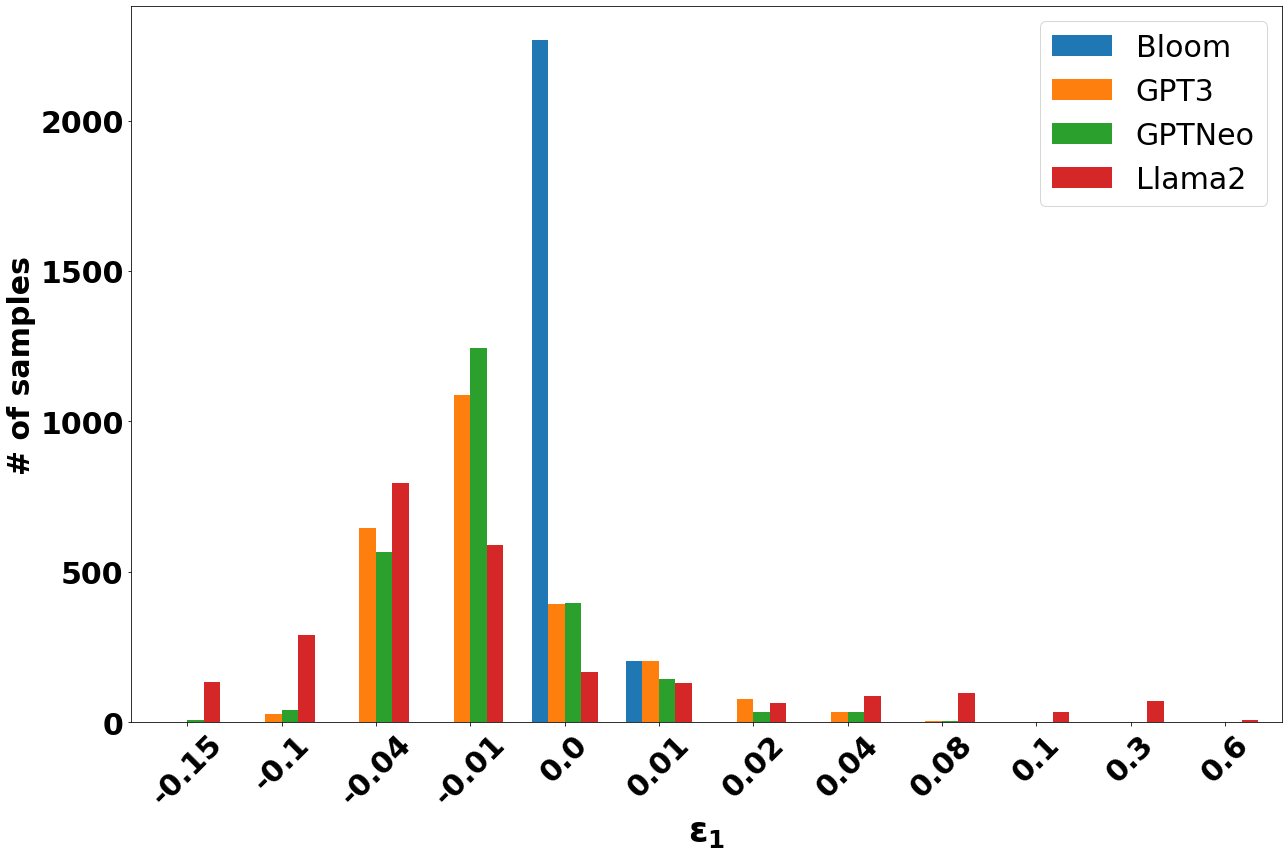

In [52]:
mrpc_anto_counts= dict(
    Bloom = np.hstack([[data[(data.bloom_anto_mrpc_diff>=eps[i]) & (data.bloom_anto_mrpc_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    GPT3 = np.hstack([[data[(data.chat_anto_mrpc_diff>=eps[i]) & (data.chat_anto_mrpc_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    GPTNeo = np.hstack([[data[(data.gptneo_anto_mrpc_diff>=eps[i]) & (data.gptneo_anto_mrpc_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    Llama2 = np.hstack([[data[(data.llama_anto_mrpc_diff>=eps[i]) & (data.llama_anto_mrpc_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
)
df_anto_mrpc_counts = pd.DataFrame(mrpc_anto_counts,index= eps[1:])
plot_counts_check(df_anto_mrpc_counts,task="Antonyms_MRPC", model_type="LLM",save=False)

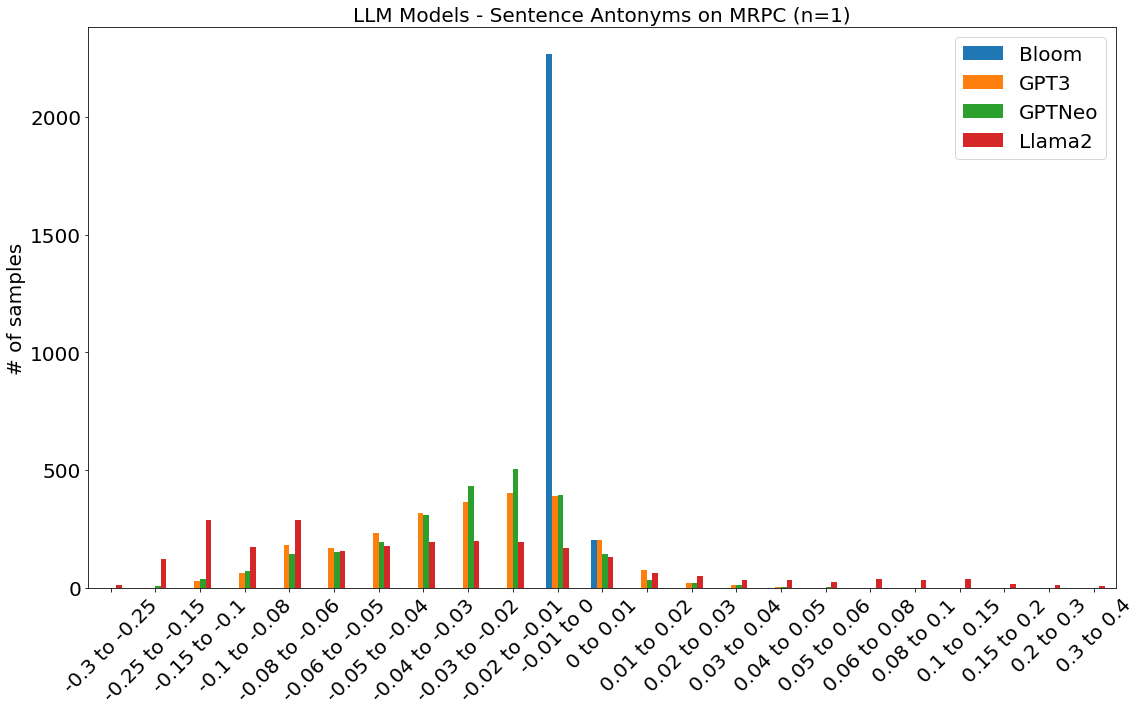

In [97]:
df_anto_mrpc_counts = pd.DataFrame(mrpc_anto_counts,index= bins)
plot_counts_check(df_anto_mrpc_counts,task="Antonyms_MRPC", model_type="LLM",save=False)

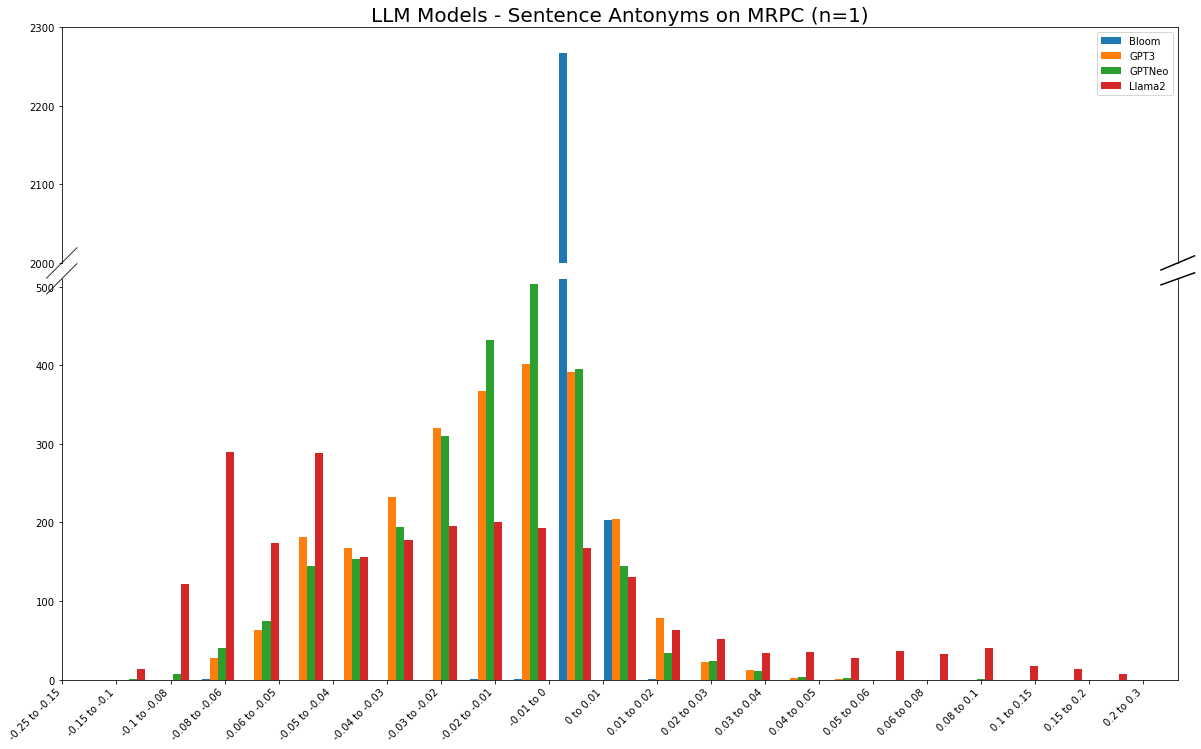

In [238]:
plot_counts(df_anto_mrpc_counts,task="Antonyms_MRPC",break_range=((0,510),(2000,2300)),model_type="LLM",save=False)


### PAWs Wiki

In [25]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'bloom_anto_mrpc_diff',
       'blom_anto_paw_diff', 'bloom_anto_qqp_diff', 'chat_anto_paw_diff',
       'chat_anto_qqp_diff', 'gptneo_anto_mrpc_diff', 'gptneo_anto_paw_diff',
       'gptneo_anto_qqp_diff', 'chat_anto_mrpc_diff', 'llama_anto_mrpc_diff',
       'llama_anto_qqp_diff', 'llama_anto_paw_diff'],
      dtype='object')

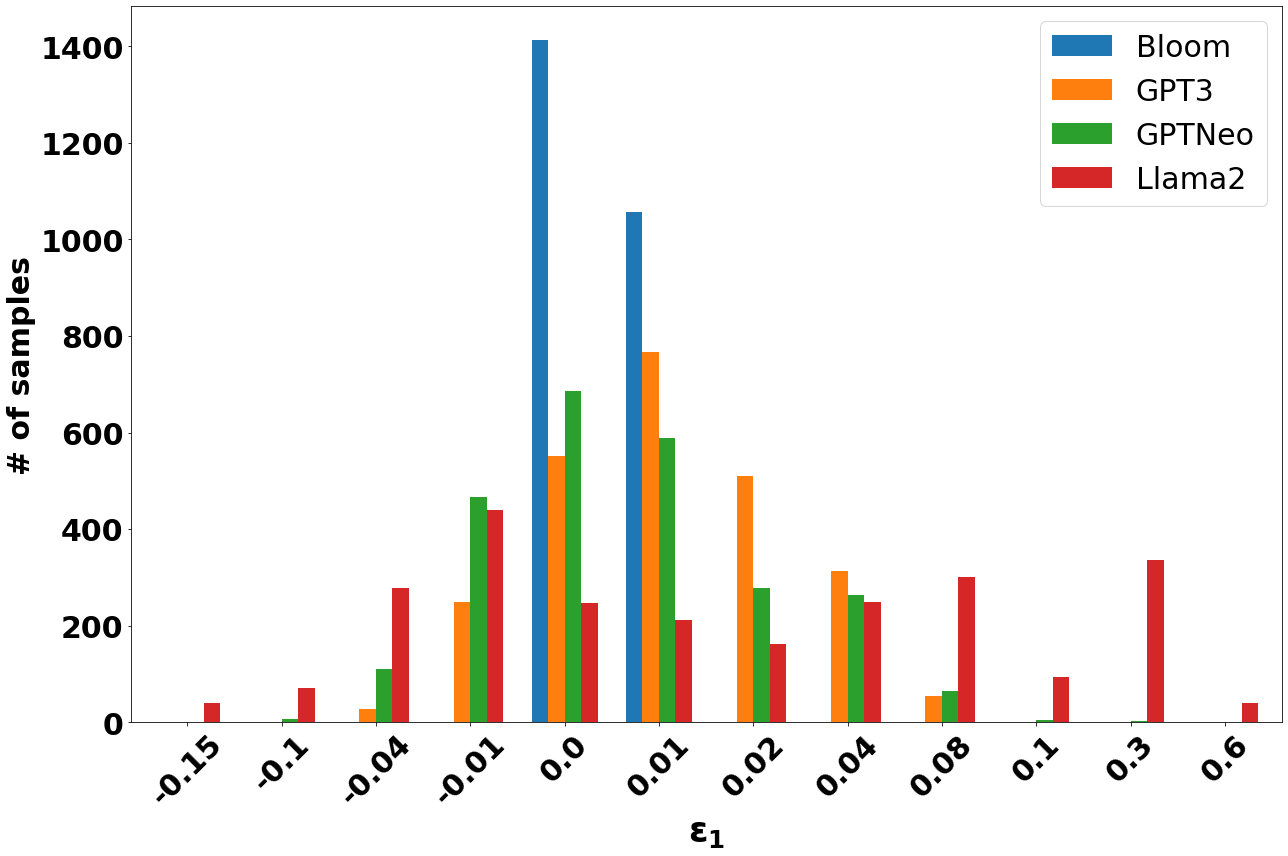

<Figure size 1296x864 with 0 Axes>

In [53]:
paw_anto_counts= dict(
    Bloom = np.hstack([[data[(data.blom_anto_paw_diff>=eps[i]) & (data.blom_anto_paw_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    GPT3 = np.hstack([[data[(data.chat_anto_paw_diff>=eps[i]) & (data.chat_anto_paw_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    GPTNeo = np.hstack([[data[(data.gptneo_anto_paw_diff>=eps[i]) & (data.gptneo_anto_paw_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    Llama2 = np.hstack([[data[(data.llama_anto_paw_diff>=eps[i]) & (data.llama_anto_paw_diff<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
)
df_anto_paw_counts = pd.DataFrame(paw_anto_counts,index= eps[1:])
plot_counts_check(df_anto_paw_counts,task="Antonyms_PAW_WIKI", model_type="LLM",save=True)

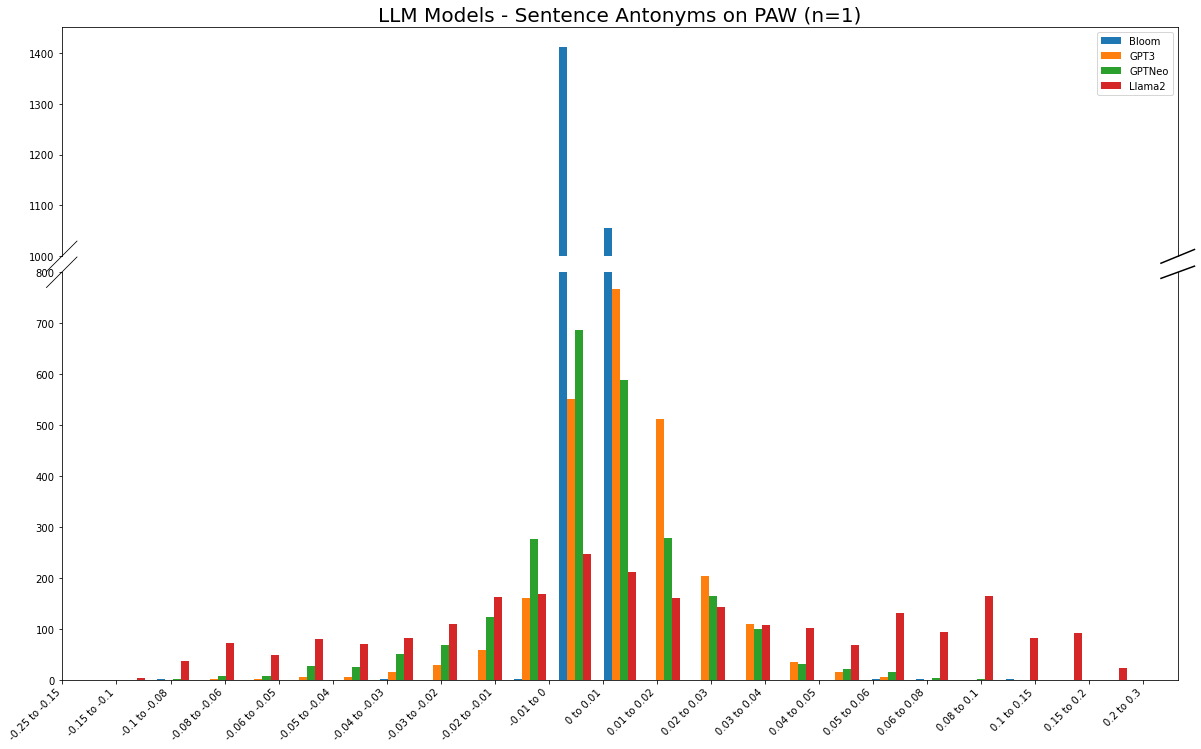

In [241]:
plot_counts(df_anto_paw_counts,task="Antonyms_PAW_WIKI",break_range=((0,800),(1000,1450)) ,model_type="LLM",save=True)

In [123]:
df_anto_qqp_counts.head()

,Bloom,GPT3,GPTNeo,Llama2
-0.3 to -0.25,0,0,0,27
-0.25 to -0.15,0,2,22,174
-0.15 to -0.1,0,30,67,239
-0.1 to -0.08,1,73,85,143
-0.08 to -0.06,2,189,164,167


## Jumbling

In [54]:
data = pd.read_csv("/home/yash/Probing-Sentence-Encoder/llm_results/all_llm_jumbling.csv")

In [257]:
data.head()

,Unnamed: 0,paw_gptneo_diff_org_n1,paw_gptneo__diff_org_n2,paw_gptneo_diff_org_n3,qqp_gptneo_diff_org_n1,qqp_gptneo_diff_org_n2,qqp_gptneo_diff_org_n3,mrpc_gptneo_diff_org_n1,mrpc_gptneo_diff_org_n2,mrpc_gptneo_diff_org_n3,...,mrpc_chat_diff_org_n3,mrpc_llama_diff_org_n1,qqp_llama_diff_org_n1,paw_llama_diff_org_n1,mrpc_llama_diff_org_n2,qqp_llama_diff_org_n2,paw_llama_diff_org_n2,mrpc_llama_diff_org_n3,qqp_llama_diff_org_n3,paw_llama_diff_org_n3
0,0,0.005221,0.029266,0.017573,-0.086733,-0.032488,-0.056572,-0.076130,-0.044530,-0.061905,...,0.030151,-0.089434,-0.210512,0.017743,0.103443,0.088680,0.146804,0.076097,0.224683,0.100407
1,1,-0.037250,0.004157,0.016475,-0.014697,-0.001903,0.082628,-0.031181,0.005572,0.043357,...,-0.018555,-0.102430,0.022006,-0.045397,0.153463,0.128020,0.194266,0.275438,0.592096,0.327573
2,2,-0.014829,-0.021693,-0.024197,0.157753,0.104399,0.117492,-0.016540,0.011939,0.029282,...,-0.083990,-0.058395,0.526850,-0.029032,-0.004489,0.469330,-0.038080,0.350480,0.420595,-0.002436
3,3,0.011509,0.037024,0.052149,-0.025269,0.024472,0.013923,-0.038421,-0.037179,-0.033865,...,-0.058816,0.067322,0.220783,0.178479,0.209061,0.081716,0.339585,0.193641,0.116172,0.500369
4,4,-0.013342,-0.002759,-0.010776,-0.017632,-0.037456,0.075194,0.004061,-0.000214,0.004348,...,-0.014454,0.201058,0.087914,-0.075196,0.169004,-0.057234,0.003095,-0.015784,0.381194,-0.029530


In [71]:
# ll_mj = pd.read_csv("../llm_results/llama2_jumbling_mrpc.csv")
# ll_qj = pd.read_csv("../llm_results/llama2_jumbling_qqp.csv")
# ll_pj = pd.read_csv("../llm_results/llama2_jumbling_paw.csv")


In [72]:
# data["mrpc_llama_diff_org_n1"] = ll_mj["diff_org_n1"]
# data["qqp_llama_diff_org_n1"] = ll_qj["diff_org_n1"]
# data["paw_llama_diff_org_n1"] = ll_pj["diff_org_n1"]

# data["mrpc_llama_diff_org_n2"] = ll_mj["diff_org_n2"]
# data["qqp_llama_diff_org_n2"] = ll_qj["diff_org_n2"]
# data["paw_llama_diff_org_n2"] = ll_pj["diff_org_n2"]

# data["mrpc_llama_diff_org_n3"] = ll_mj["diff_org_n3"]
# data["qqp_llama_diff_org_n3"] = ll_qj["diff_org_n3"]
# data["paw_llama_diff_org_n3"] = ll_pj["diff_org_n3"]



In [238]:
data.head()

,Unnamed: 0,paw_gptneo_diff_org_n1,paw_gptneo__diff_org_n2,paw_gptneo_diff_org_n3,qqp_gptneo_diff_org_n1,qqp_gptneo_diff_org_n2,qqp_gptneo_diff_org_n3,mrpc_gptneo_diff_org_n1,mrpc_gptneo_diff_org_n2,mrpc_gptneo_diff_org_n3,...,mrpc_chat_diff_org_n3,mrpc_llama_diff_org_n1,qqp_llama_diff_org_n1,paw_llama_diff_org_n1,mrpc_llama_diff_org_n2,qqp_llama_diff_org_n2,paw_llama_diff_org_n2,mrpc_llama_diff_org_n3,qqp_llama_diff_org_n3,paw_llama_diff_org_n3
0,0,0.005221,0.029266,0.017573,-0.086733,-0.032488,-0.056572,-0.076130,-0.044530,-0.061905,...,0.030151,-0.089434,-0.210512,0.017743,0.103443,0.088680,0.146804,0.076097,0.224683,0.100407
1,1,-0.037250,0.004157,0.016475,-0.014697,-0.001903,0.082628,-0.031181,0.005572,0.043357,...,-0.018555,-0.102430,0.022006,-0.045397,0.153463,0.128020,0.194266,0.275438,0.592096,0.327573
2,2,-0.014829,-0.021693,-0.024197,0.157753,0.104399,0.117492,-0.016540,0.011939,0.029282,...,-0.083990,-0.058395,0.526850,-0.029032,-0.004489,0.469330,-0.038080,0.350480,0.420595,-0.002436
3,3,0.011509,0.037024,0.052149,-0.025269,0.024472,0.013923,-0.038421,-0.037179,-0.033865,...,-0.058816,0.067322,0.220783,0.178479,0.209061,0.081716,0.339585,0.193641,0.116172,0.500369
4,4,-0.013342,-0.002759,-0.010776,-0.017632,-0.037456,0.075194,0.004061,-0.000214,0.004348,...,-0.014454,0.201058,0.087914,-0.075196,0.169004,-0.057234,0.003095,-0.015784,0.381194,-0.029530


In [57]:
# data.to_csv("/home/yash/Probing-Sentence-Encoder/llm_results/all_llm_jumbling.csv")

In [258]:
data.columns

Index(['Unnamed: 0', 'paw_gptneo_diff_org_n1', 'paw_gptneo__diff_org_n2',
       'paw_gptneo_diff_org_n3', 'qqp_gptneo_diff_org_n1',
       'qqp_gptneo_diff_org_n2', 'qqp_gptneo_diff_org_n3',
       'mrpc_gptneo_diff_org_n1', 'mrpc_gptneo_diff_org_n2',
       'mrpc_gptneo_diff_org_n3', 'qqp_bloom_diff_org_n1',
       'qqp_bloom_diff_org_n2', 'qqp_bloom_diff_org_n3',
       'paw_bloom_diff_org_n1', 'paw_bloom_diff_org_n2',
       'paw_bloom_diff_org_n3', 'mrpc_bloom_diff_org_n1',
       'mrpc_bloom_diff_org_n2', 'mrpc_bloom_diff_org_n3',
       'paw_chat_diff_org_n1', 'paw_chat_diff_org_n2', 'paw_chat_diff_org_n3',
       'qqp_chat_diff_org_n1', 'qqp_chat_diff_org_n2', 'qqp_chat_diff_org_n3',
       'mrpc_chat_diff_org_n1', 'mrpc_chat_diff_org_n2',
       'mrpc_chat_diff_org_n3', 'mrpc_llama_diff_org_n1',
       'qqp_llama_diff_org_n1', 'paw_llama_diff_org_n1',
       'mrpc_llama_diff_org_n2', 'qqp_llama_diff_org_n2',
       'paw_llama_diff_org_n2', 'mrpc_llama_diff_org_n3',
       'qqp

### n = 1 

In [55]:
jumb_n1_counts = dict(
    Bloom = np.hstack([[data[(data.paw_bloom_diff_org_n1>=eps[i]) & (data.paw_bloom_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPT3 = np.hstack([[data[(data.paw_chat_diff_org_n1>=eps[i]) & (data.paw_chat_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPTNeo = np.hstack([[data[(data.paw_gptneo_diff_org_n1>=eps[i]) & (data.paw_gptneo_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    Llama2 = np.hstack([[data[(data.paw_llama_diff_org_n1>=eps[i]) & (data.paw_llama_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)])
    
)
df_jumb_n1_counts = pd.DataFrame(jumb_n1_counts,index= eps[1:])

In [75]:

# jumb_n1_counts = dict(
# # Bloom model
# # bloom_mrpc = np.hstack([[data[(data.mrpc_bloom_diff_org_n1>=eps[i]) & (data.mrpc_bloom_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
# bloom_qqp = np.hstack([[data[(data.qqp_bloom_diff_org_n3>=eps[i]) & (data.qqp_bloom_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
# # bloom_paw =np.hstack([[data[(data.paw_bloom_diff_org_n3>=eps[i]) & (data.paw_bloom_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),

# # gpt3.5 model
# # chat_mrpc_count = np.hstack([[data[(data.mrpc_chat_diff_org_n3>=eps[i]) & (data.mrpc_chat_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
# chat_qqp_count = np.hstack([[data[(data.qqp_chat_diff_org_n3>=eps[i]) & (data.qqp_chat_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
# # # chat_paw_count = np.hstack([[data[(data.paw_chat_diff_org_n3>=eps[i]) & (data.paw_chat_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),

# #gptneo 
# # gptneo_mrpc_count = np.hstack([[data[(data.mrpc_gptneo_diff_org_n3>=eps[i]) & (data.mrpc_gptneo_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
# gptneo_qqp_count = np.hstack([[data[(data.qqp_gptneo_diff_org_n3>=eps[i]) & (data.qqp_gptneo_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
# # # gptneo_paw_count = np.hstack([[data[(data.paw__gptneo_diff_org_n1>=eps[i]) & (data.paw_gptneo_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)])
# )


# df_jumb_n1_counts = pd.DataFrame(jumb_n1_counts,index= bins)

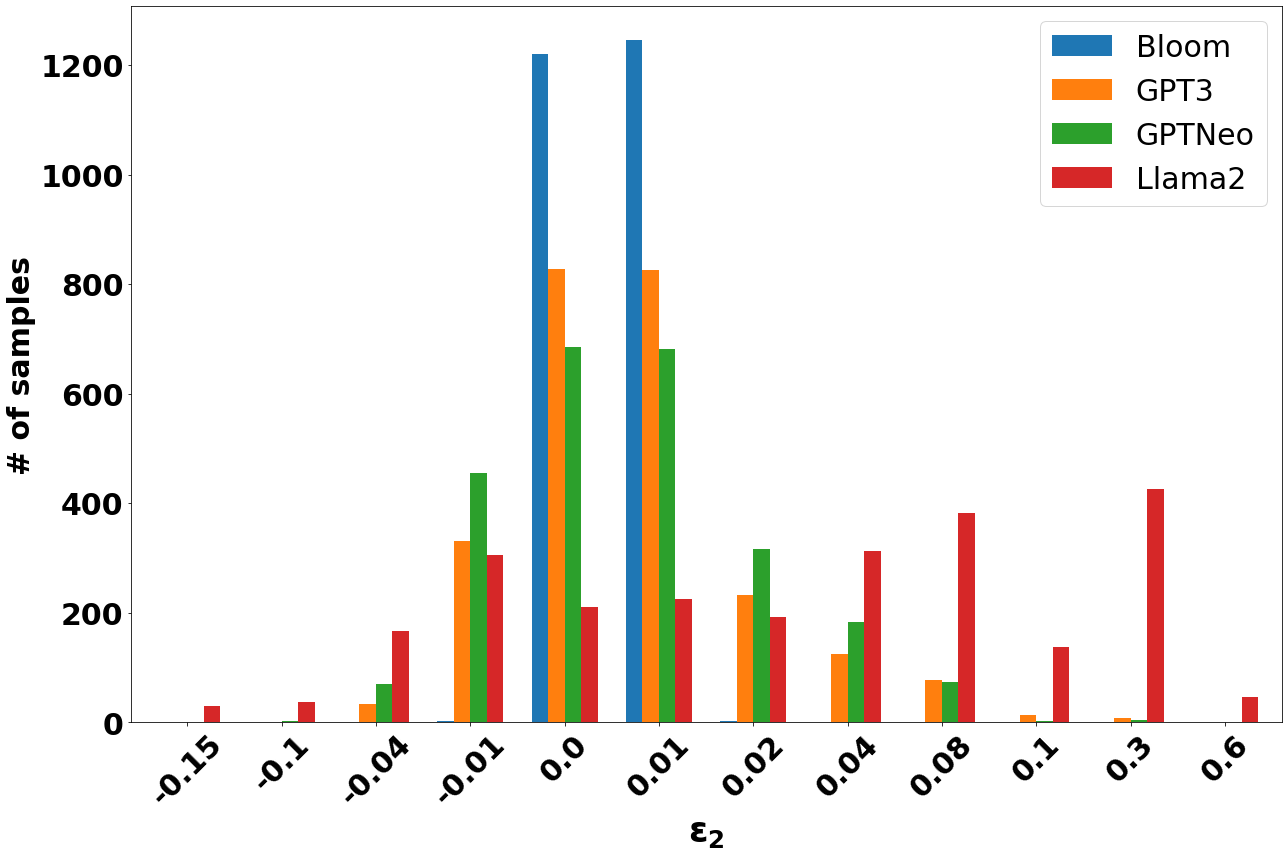

In [56]:
plot_counts_check(df_jumb_n1_counts,task="Jumbling_PAW",model_type="LLM", n=1)

In [57]:
jumb_n1_mrpc_counts = dict(
    Bloom = np.hstack([[data[(data.mrpc_bloom_diff_org_n1>=eps[i]) & (data.mrpc_bloom_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPT3 = np.hstack([[data[(data.mrpc_chat_diff_org_n1>=eps[i]) & (data.mrpc_chat_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPTNeo = np.hstack([[data[(data.mrpc_gptneo_diff_org_n1>=eps[i]) & (data.mrpc_gptneo_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    Llama2 = np.hstack([[data[(data.mrpc_llama_diff_org_n1>=eps[i]) & (data.mrpc_llama_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)])
    
)
df_jumb_n1_mrpc_counts = pd.DataFrame(jumb_n1_mrpc_counts,index= eps[1:])

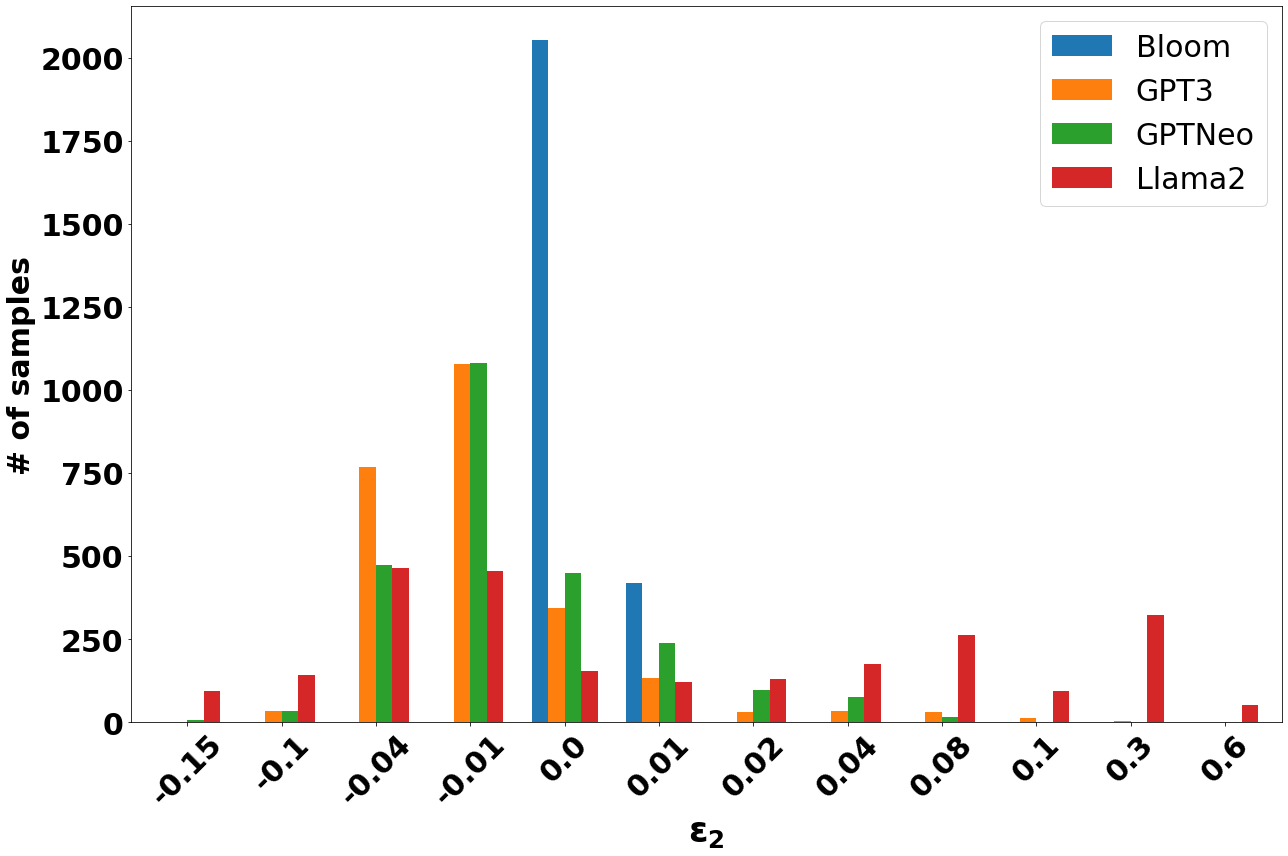

In [58]:
plot_counts_check(df_jumb_n1_mrpc_counts,task="Jumbling_MRPC",model_type="LLM", n=1)

In [45]:
jumb_n1_qqp_counts = dict(
    Bloom = np.hstack([[data[(data.qqp_bloom_diff_org_n1>=eps[i]) & (data.qqp_bloom_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPT3 = np.hstack([[data[(data.qqp_chat_diff_org_n1>=eps[i]) & (data.qqp_chat_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPTNeo = np.hstack([[data[(data.qqp_gptneo_diff_org_n1>=eps[i]) & (data.qqp_gptneo_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    Llama2 = np.hstack([[data[(data.qqp_llama_diff_org_n1>=eps[i]) & (data.qqp_llama_diff_org_n1<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)])
    
)
df_jumb_n1_qqp_counts = pd.DataFrame(jumb_n1_qqp_counts,index= eps[1:])

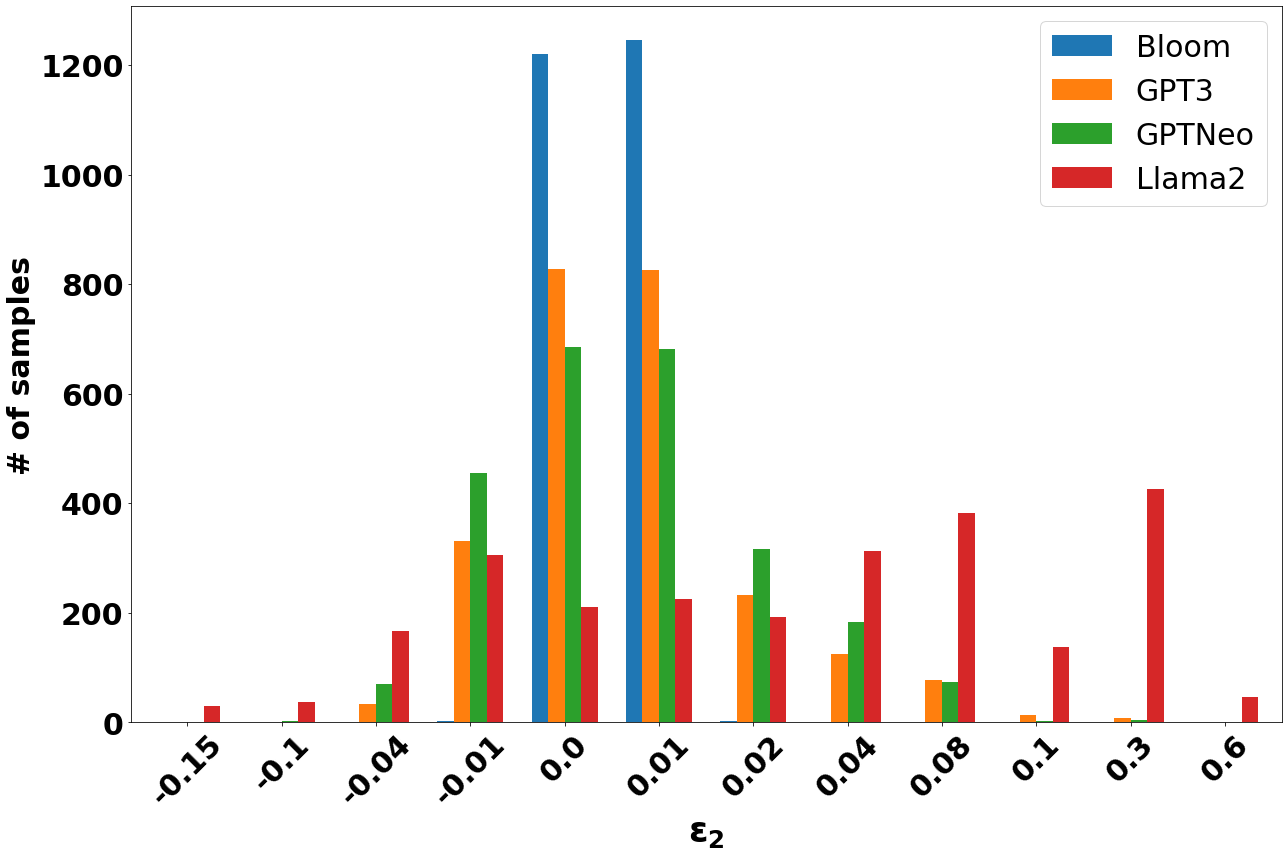

In [59]:
plot_counts_check(df_jumb_n1_counts,task="Jumbling_QQP",model_type="LLM", n=1)

### n = 2

In [15]:
data.columns

Index(['Unnamed: 0', 'paw_gptneo_diff_org_n1', 'paw_gptneo__diff_org_n2',
       'paw_gptneo_diff_org_n3', 'qqp_gptneo_diff_org_n1',
       'qqp_gptneo_diff_org_n2', 'qqp_gptneo_diff_org_n3',
       'mrpc_gptneo_diff_org_n1', 'mrpc_gptneo_diff_org_n2',
       'mrpc_gptneo_diff_org_n3', 'qqp_bloom_diff_org_n1',
       'qqp_bloom_diff_org_n2', 'qqp_bloom_diff_org_n3',
       'paw_bloom_diff_org_n1', 'paw_bloom_diff_org_n2',
       'paw_bloom_diff_org_n3', 'mrpc_bloom_diff_org_n1',
       'mrpc_bloom_diff_org_n2', 'mrpc_bloom_diff_org_n3',
       'paw_chat_diff_org_n1', 'paw_chat_diff_org_n2', 'paw_chat_diff_org_n3',
       'qqp_chat_diff_org_n1', 'qqp_chat_diff_org_n2', 'qqp_chat_diff_org_n3',
       'mrpc_chat_diff_org_n1', 'mrpc_chat_diff_org_n2',
       'mrpc_chat_diff_org_n3', 'mrpc_llama_diff_org_n1',
       'qqp_llama_diff_org_n1', 'paw_llama_diff_org_n1',
       'mrpc_llama_diff_org_n2', 'qqp_llama_diff_org_n2',
       'paw_llama_diff_org_n2', 'mrpc_llama_diff_org_n3',
       'qqp

In [60]:
jumb_n2_counts = dict(
    Bloom = np.hstack([[data[(data.paw_bloom_diff_org_n2>=eps[i]) & (data.paw_bloom_diff_org_n2<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPT35 = np.hstack([[data[(data.paw_chat_diff_org_n2>=eps[i]) & (data.paw_chat_diff_org_n2<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPTNeo = np.hstack([[data[(data.paw_gptneo__diff_org_n2>=eps[i]) & (data.paw_gptneo__diff_org_n2<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    Llama = np.hstack([[data[(data.paw_llama_diff_org_n2>=eps[i]) & (data.paw_llama_diff_org_n2<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)])
    
)
df_jumb_n2_counts = pd.DataFrame(jumb_n2_counts,index= eps[1:])

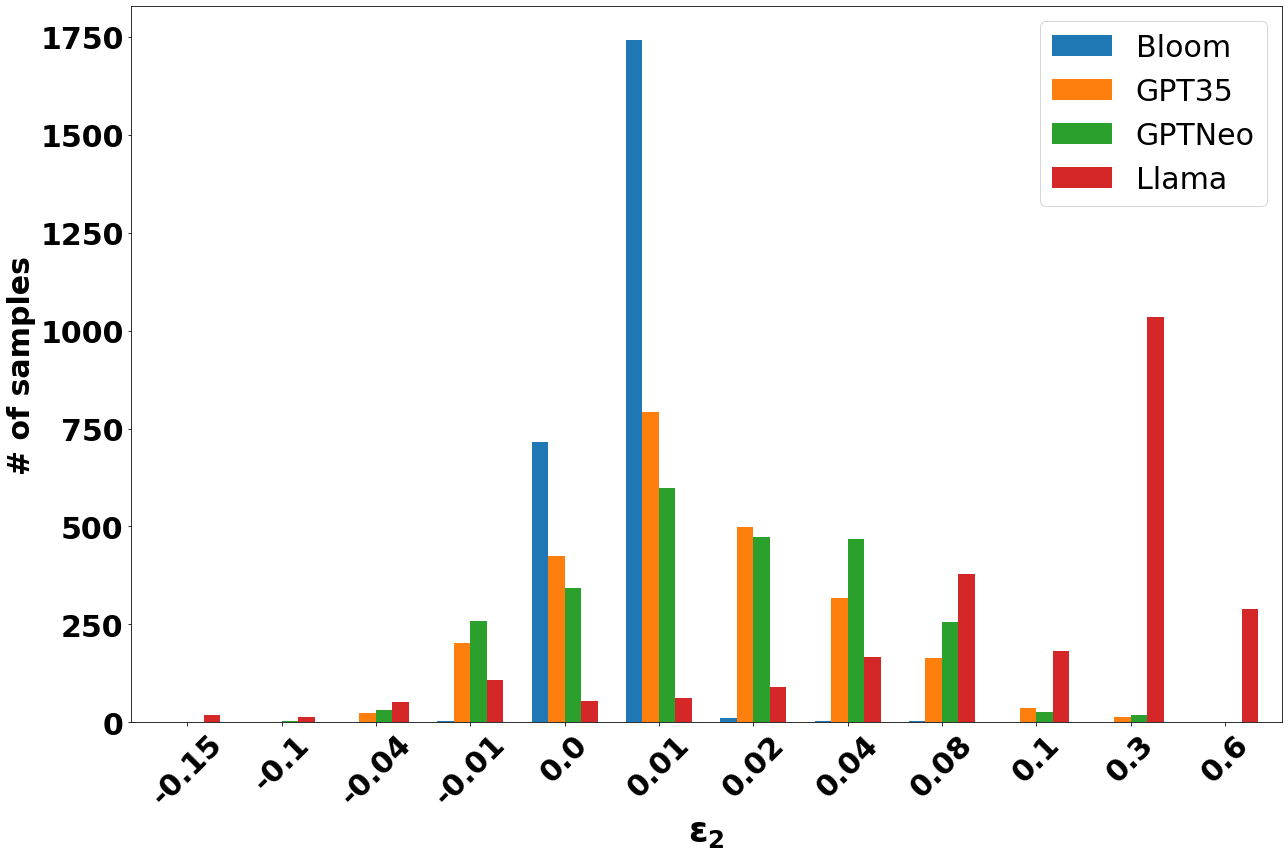

In [61]:
plot_counts_check(df_jumb_n2_counts,task="Jumbling_PAW",model_type="LLM", n=2)

In [62]:
jumb_n2_mrpc_counts = dict(
    Bloom = np.hstack([[data[(data.mrpc_bloom_diff_org_n2>=eps[i]) & (data.mrpc_bloom_diff_org_n2<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPT35 = np.hstack([[data[(data.mrpc_chat_diff_org_n2>=eps[i]) & (data.mrpc_chat_diff_org_n2<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPTNeo = np.hstack([[data[(data.mrpc_gptneo_diff_org_n2>=eps[i]) & (data.mrpc_gptneo_diff_org_n2<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    Llama = np.hstack([[data[(data.mrpc_llama_diff_org_n2>=eps[i]) & (data.mrpc_llama_diff_org_n2<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)])
    
)
df_jumb_n2_mrpc_counts = pd.DataFrame(jumb_n2_mrpc_counts,index= eps[1:])

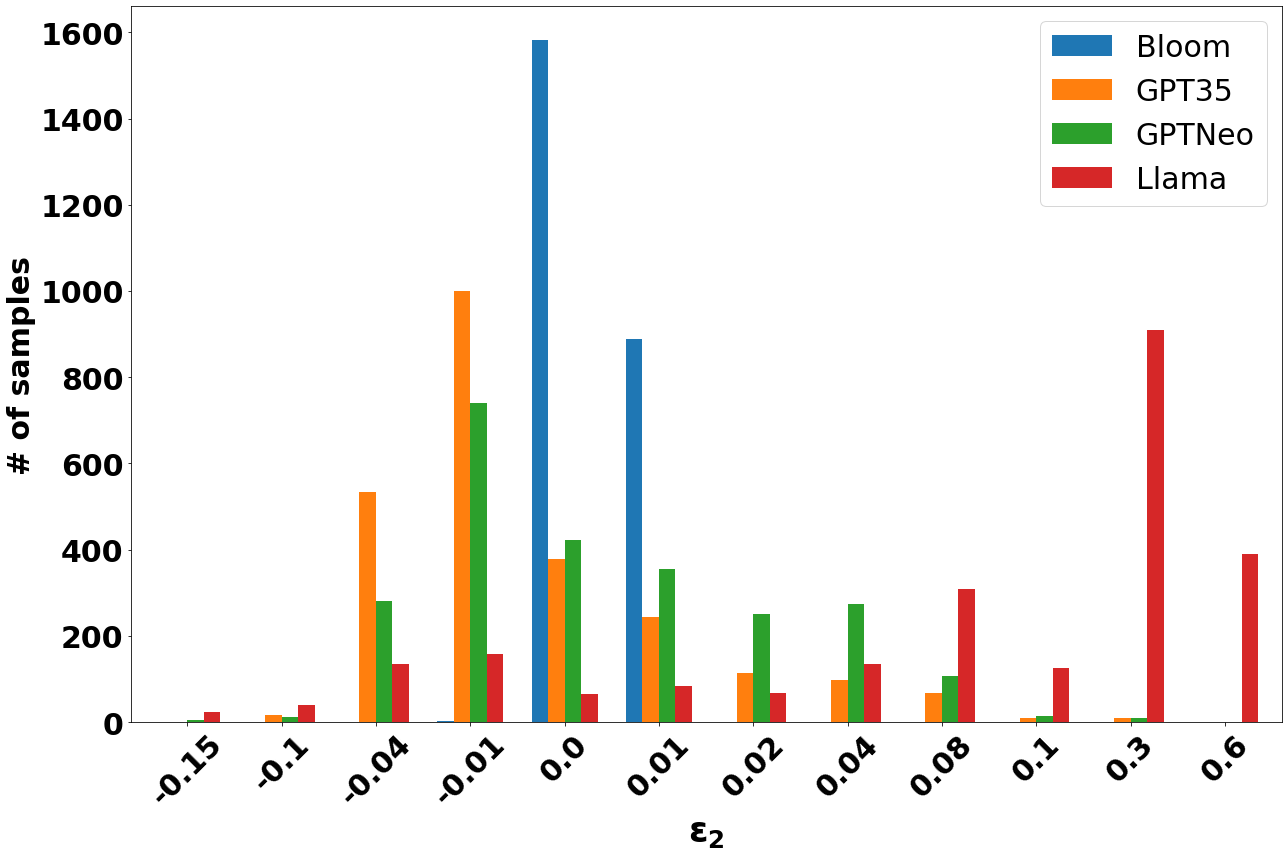

In [63]:
plot_counts_check(df_jumb_n2_mrpc_counts,task="Jumbling_MRPC",model_type="LLM", n=2)

In [64]:
jumb_n2_qqp_counts = dict(
    Bloom = np.hstack([[data[(data.qqp_bloom_diff_org_n2>=eps[i]) & (data.qqp_bloom_diff_org_n2<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPT35 = np.hstack([[data[(data.qqp_chat_diff_org_n2>=eps[i]) & (data.qqp_chat_diff_org_n2<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPTNeo = np.hstack([[data[(data.qqp_gptneo_diff_org_n2>=eps[i]) & (data.qqp_gptneo_diff_org_n2<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    Llama = np.hstack([[data[(data.qqp_llama_diff_org_n2>=eps[i]) & (data.qqp_llama_diff_org_n2<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)])
    
)
df_jumb_n2_qqp_counts = pd.DataFrame(jumb_n2_qqp_counts,index= eps[1:])

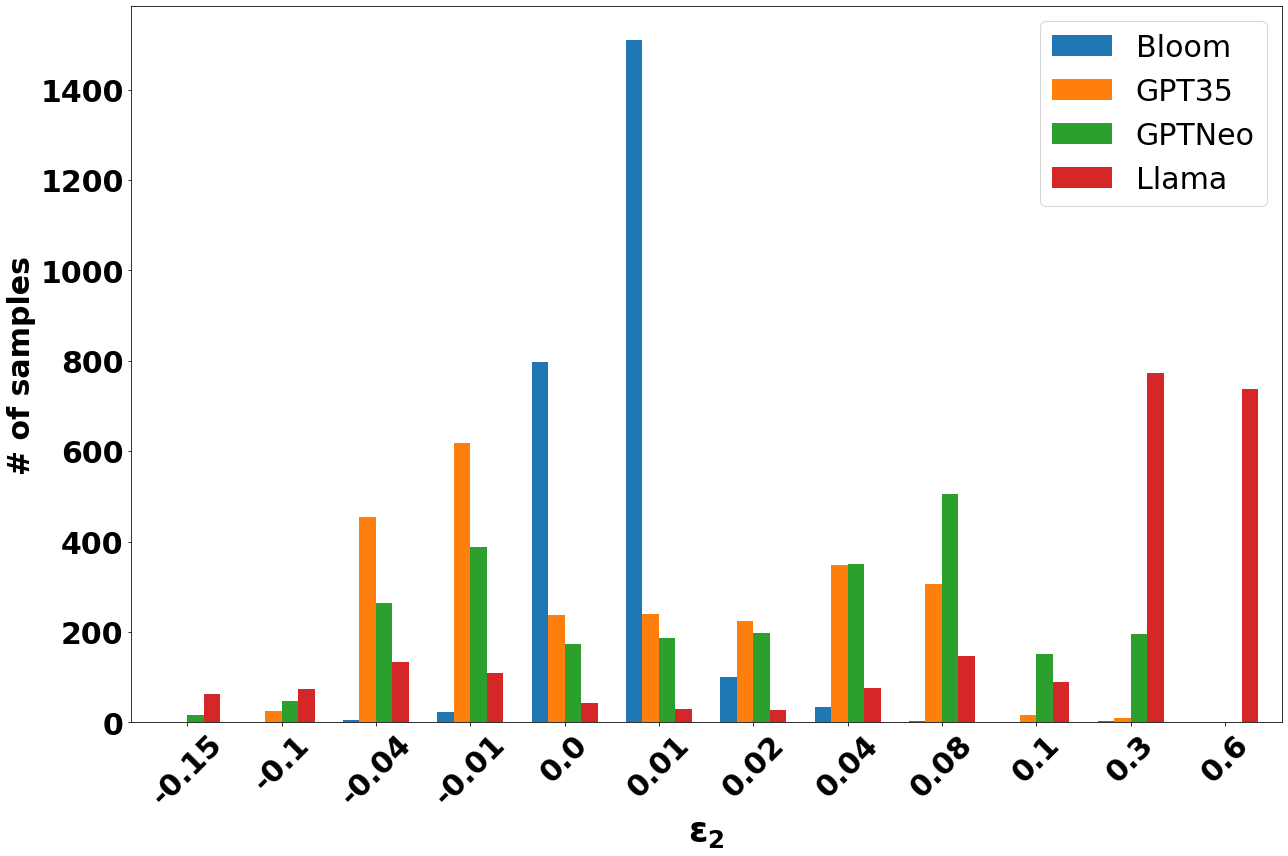

In [65]:
plot_counts_check(df_jumb_n2_qqp_counts,task="Jumbling_QQP",model_type="LLM", n=2)

### n=3

In [66]:
jumb_n3_counts = dict(
    Bloom = np.hstack([[data[(data.paw_bloom_diff_org_n3>=eps[i]) & (data.paw_bloom_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPT3 = np.hstack([[data[(data.paw_chat_diff_org_n3>=eps[i]) & (data.paw_chat_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPTNeo = np.hstack([[data[(data.paw_gptneo_diff_org_n3>=eps[i]) & (data.paw_gptneo_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    Llama = np.hstack([[data[(data.paw_llama_diff_org_n3>=eps[i]) & (data.paw_llama_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)])
    
)
df_jumb_n3_counts = pd.DataFrame(jumb_n3_counts,index= eps[1:])

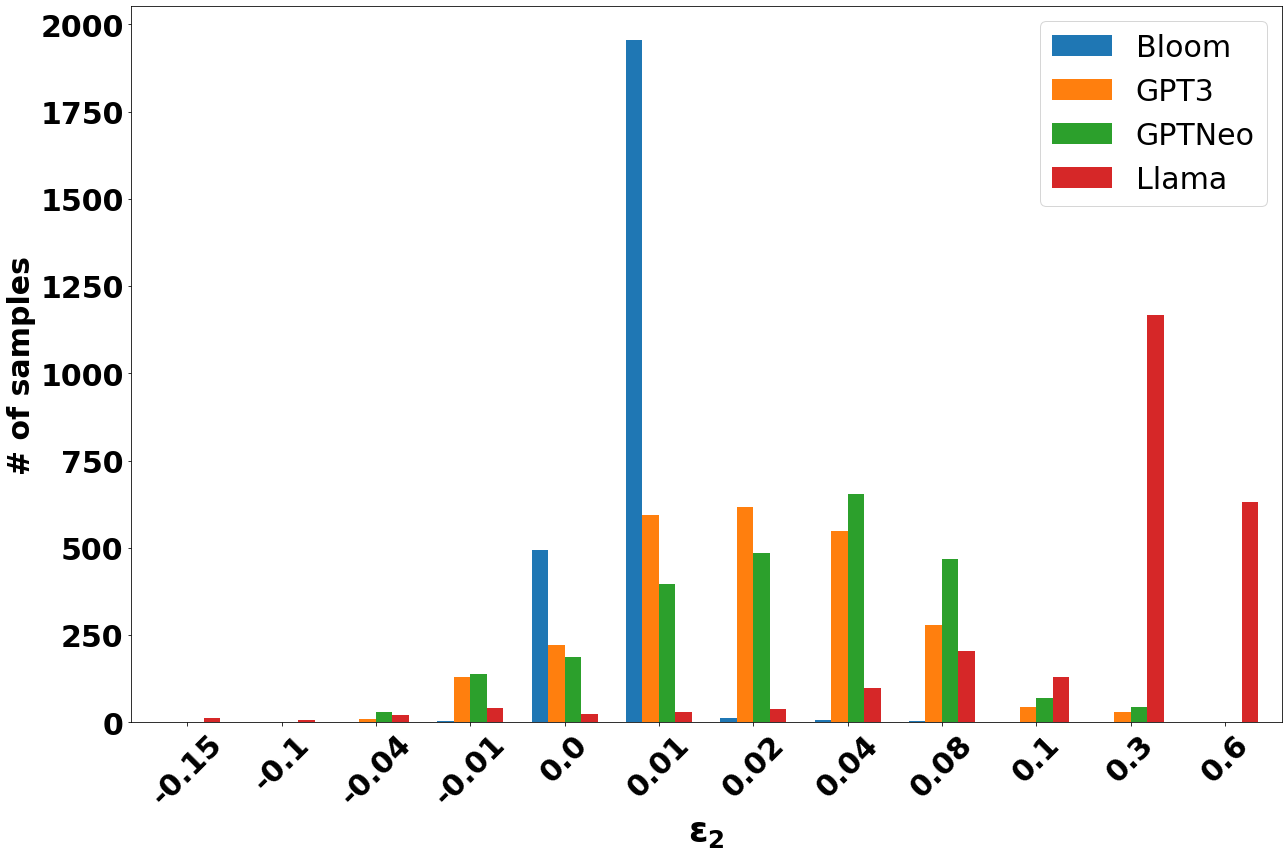

In [67]:
plot_counts_check(df_jumb_n3_counts,task="Jumbling_PAW",model_type="LLM", n=3)

In [68]:
jumb_n3_qqp_counts = dict(
    Bloom = np.hstack([[data[(data.qqp_bloom_diff_org_n3>=eps[i]) & (data.qqp_bloom_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPT3 = np.hstack([[data[(data.qqp_chat_diff_org_n3>=eps[i]) & (data.qqp_chat_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPTNeo = np.hstack([[data[(data.qqp_gptneo_diff_org_n3>=eps[i]) & (data.qqp_gptneo_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    Llama = np.hstack([[data[(data.qqp_llama_diff_org_n3>=eps[i]) & (data.qqp_llama_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)])
    
)
df_jumb_n3_qqp_counts = pd.DataFrame(jumb_n3_qqp_counts,index= eps[1:])

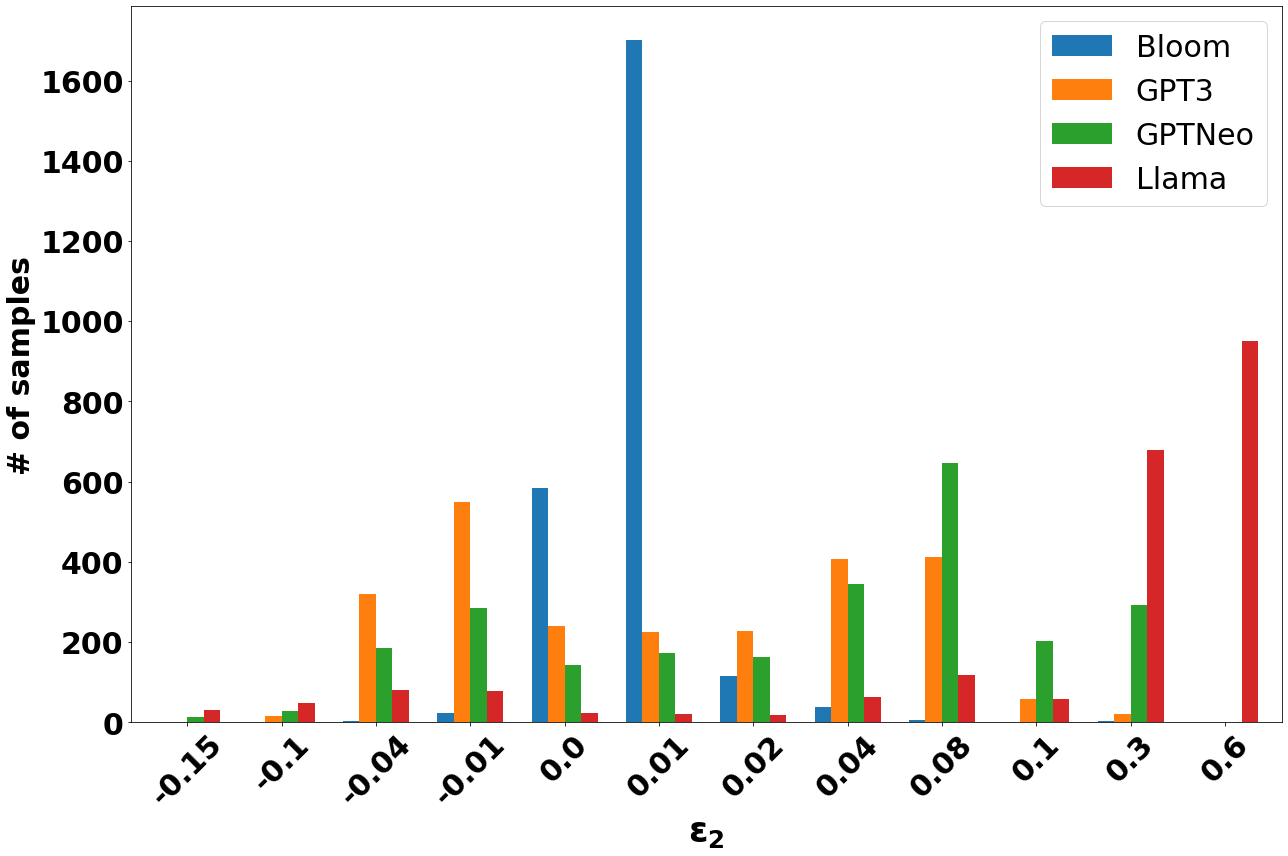

In [69]:
plot_counts_check(df_jumb_n3_qqp_counts,task="Jumbling_QQP",model_type="LLM", n=3)


In [70]:
jumb_n3_mrpc_counts = dict(
    Bloom = np.hstack([[data[(data.mrpc_bloom_diff_org_n3>=eps[i]) & (data.mrpc_bloom_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPT3 = np.hstack([[data[(data.mrpc_chat_diff_org_n3>=eps[i]) & (data.mrpc_chat_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    
    GPTNeo = np.hstack([[data[(data.mrpc_gptneo_diff_org_n3>=eps[i]) & (data.mrpc_gptneo_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)]),
    Llama = np.hstack([[data[(data.mrpc_llama_diff_org_n3>=eps[i]) & (data.mrpc_llama_diff_org_n3<eps[i+1])].value_counts().sum()] for i in range(len(eps)-1)])
    
)
df_jumb_n3_mrpc_counts = pd.DataFrame(jumb_n3_mrpc_counts,index= eps[1:])

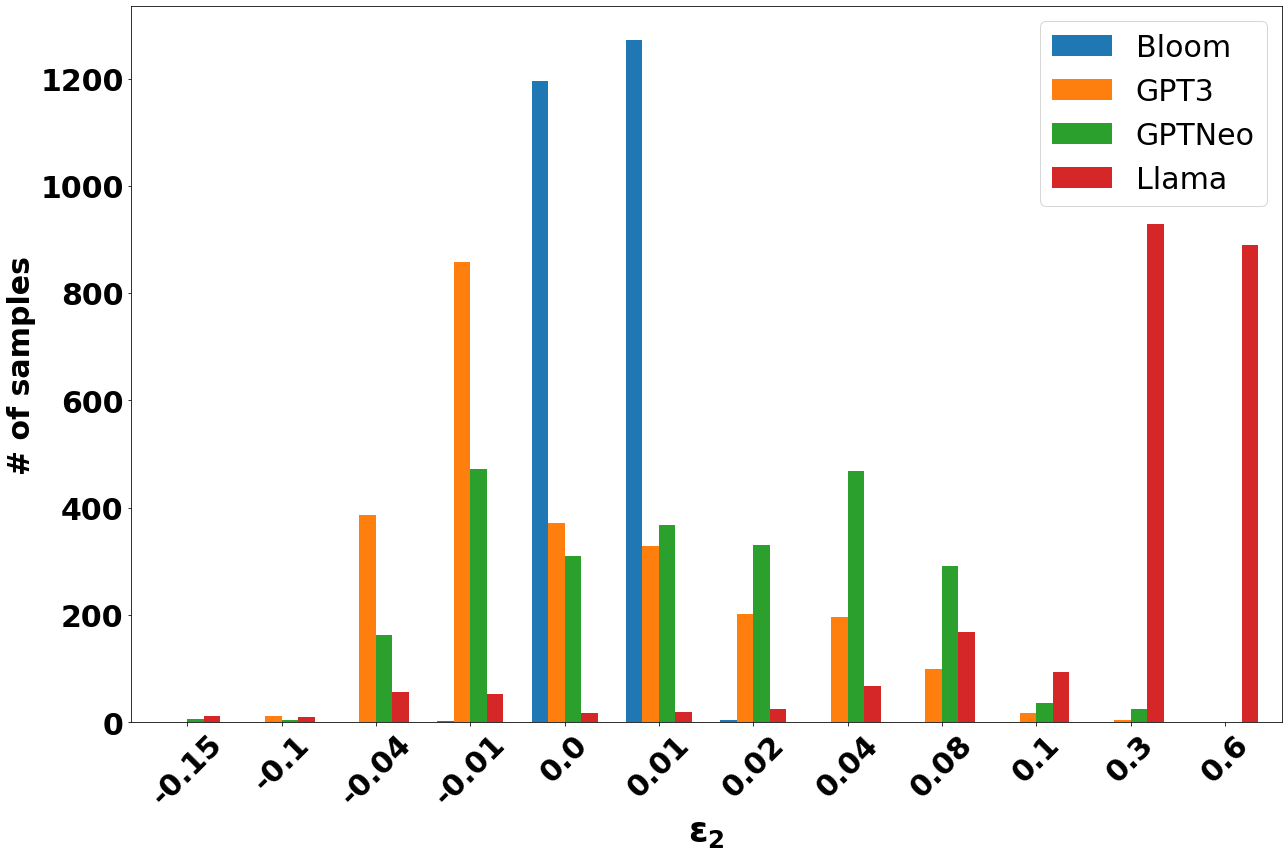

In [71]:
plot_counts_check(df_jumb_n3_mrpc_counts,task="Jumbling_MRPC",model_type="LLM", n=3)

# Classic sentence encoder

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Jumbling

In [14]:
sim_mrpc = pd.read_csv("/data/yash/Encoder-Evaluation/llm_results/simcse/jumbling/jumbling_mrpc.csv")
sim_qqp = pd.read_csv("/data/yash/Encoder-Evaluation/llm_results/simcse/jumbling/jumbling_qqp.csv")
sim_paws = pd.read_csv("/data/yash/Encoder-Evaluation/llm_results/simcse/jumbling/jumbling_paw.csv")


In [30]:
sim_paws.head()

,Unnamed: 0,original_sentence,paraphrased,n1,n2,n3,sim_org_para,sim_org_n1,sim_org_n2,sim_org_n3,diff_org_para,diff_org_n1,diff_org_n2,diff_org_n3
0,0,Allan Stewart ( 1865-1951 ) was a Scottish pai...,Allan Stewart ( 1865 - 1951 ) was a Scottish p...,Allan Stewart ( 1865-1951 ) portraits a Scotti...,Allan romantic ( 1865-1951 ) and a Scottish pa...,Stewart Allan ( 1865-1951 ) as a Scottish pain...,0.999293,0.963508,0.932021,0.964540,0.0,0.035785,0.067272,0.034753
1,1,Allie sails from England to Australia alone af...,"After her father 's death , Allie sails alone ...",Allie sails from England to Australia alone he...,Allie sails . England to father alone after he...,after Allie from England to Australia alone sa...,0.975377,0.962901,0.883901,0.904951,0.0,0.012476,0.091477,0.070426
2,2,"In 1912 , immediately after he and Whitehead P...","Immediately after he and Whitehead wrote PM , ...","In 1912 , immediately PM he and Whitehead afte...","In 1912 , immediately , he and Whitehead `` wr...","In 1912 , immediately after he and Whitehead P...",0.975831,0.947672,0.907040,0.965474,0.0,0.028159,0.068792,0.010357
3,3,`` Town Without Pity '' is a song written by c...,`` Town Without Pity '' is a song written by t...,`` Town Without Pity '' is a song written by c...,`` Town Without and '' a is song written by co...,`` song Without Pity and is a Town written by ...,0.997875,0.987246,0.932963,0.909055,0.0,0.010630,0.064912,0.088820
4,4,"On the runway , she has walked for Lacoste , M...",On the runway she went among others for Lacost...,"On the runway , she has walked for Lacoste , M...","On the runway , she has Lacoste for , walked M...","On the runway , she has walked for Lacoste , M...",0.902976,0.998666,0.954772,0.984954,0.0,-0.095691,-0.051796,-0.081978


In [11]:
data_jumbling = pd.read_csv("/data/yash/Encoder-Evaluation/data/all_model_diff_value_n1_2.csv")

In [81]:
# data_jumbling.to_csv("/data/yash/Encoder-Evaluation/data/all_model_diff_value_n1_2_v2.csv")

In [12]:
eps=[-0.5,-0.3,-0.2,-0.1,-0.05,0,0.05,0.1,0.2,0.3,0.5]

In [19]:
data_jumbling.head()

,Unnamed: 0,sbert_qqp_jumbling_data_n1,sbert_paws_jumbling_data_n1,sbert_mrpc_jumbling_data_n1,sbert_qqp_jumbling_data_n2,sbert_paws_jumbling_data_n2,sbert_mrpc_jumbling_data_n2,laser_paws_jumbling_n1,laser_paws_jumbling_n2,laser_qqp_jumbling_n1,...,infer_paws_jumbling_n2,use_qqp_jumbling_n1,use_qqp_jumbling_n2,use_mrpc_jumbling_n1,use_mrpc_jumbling_n2,use_paws_jumbling_n1,use_paws_jumbling_n2,simcse_mrpc_diff_n1,simcse_mrpc_diff_n2,simcse_mrpc_diff_n3
0,0,-0.174876,0.005940,-0.026998,-0.155511,0.026318,-0.021741,0.020927,0.044017,-0.257659,...,-0.026433,-0.286592,-0.230281,-0.049421,-0.067843,-0.037921,-0.024995,-0.039860,-0.002273,0.024951
1,1,0.016133,-0.009091,-0.113970,0.033372,0.048944,-0.066173,-0.136371,-0.046077,-0.059041,...,-0.047771,-0.098925,-0.096990,-0.187774,-0.178048,-0.007632,0.047722,-0.127815,-0.039934,0.029639
2,2,-0.354409,-0.010491,-0.082589,-0.328852,0.003730,-0.071516,-0.047975,-0.016595,-0.040074,...,-0.034022,-0.063088,-0.005458,-0.311241,-0.293166,-0.048846,-0.046991,-0.233365,-0.175636,-0.138515
3,3,-0.108812,0.016550,-0.048104,-0.097261,0.073745,-0.031491,0.011470,0.049160,-0.233802,...,0.019112,-0.077210,-0.058708,-0.283037,-0.253680,0.012569,0.045936,-0.124534,-0.104149,-0.117979
4,4,-0.001279,-0.045303,-0.092430,-0.048548,-0.026524,-0.067208,-0.027201,-0.017992,0.001772,...,-0.026972,-0.049029,-0.103628,-0.329646,-0.193016,-0.009306,-0.001314,-0.080415,-0.033816,-0.093568


In [25]:
data_jumbling["simcse_mrpc_jumbling_n1"] = sim_mrpc["diff_org_n1"]
data_jumbling["simcse_mrpc_jumbling_n2"] = sim_mrpc["diff_org_n2"]
data_jumbling["simcse_mrpc_jumbling_n3"] = sim_mrpc["diff_org_n3"]


In [37]:
data_jumbling["simcse_qqp_jumbling_n1"] = sim_qqp["diff_org_n1"]
data_jumbling["simcse_qqp_jumbling_n2"] = sim_qqp["diff_org_n2"]
data_jumbling["simcse_qqp_jumbling_n3"] = sim_qqp["diff_org_n3"]

data_jumbling["simcse_paws_jumbling_n1"] = sim_paws["diff_org_n1"]
data_jumbling["simcse_paws_jumbling_n2"] = sim_paws["diff_org_n2"]
data_jumbling["simcse_paws_jumbling_n3"] = sim_paws["diff_org_n3"]

In [40]:
data_jumbling.columns

Index(['Unnamed: 0', 'sbert_qqp_jumbling_data_n1',
       'sbert_paws_jumbling_data_n1', 'sbert_mrpc_jumbling_data_n1',
       'sbert_qqp_jumbling_data_n2', 'sbert_paws_jumbling_data_n2',
       'sbert_mrpc_jumbling_data_n2', 'laser_paws_jumbling_n1',
       'laser_paws_jumbling_n2', 'laser_qqp_jumbling_n1',
       'laser_qqp_jumbling_n2', 'laser_mrpc_jumbling_n1',
       'laser_mrpc_jumbling_n2', 'infer_mrpc_jumbling_n1',
       'infer_mrpc_jumbling_n2', 'infer_qqp_jumbling_n1',
       'infer_qqp_jumbling_n2', 'doc_jumbling_qqp_n1', 'doc_jumbling_qqp_n2',
       'doc_jumbling_mrpc_n1', 'doc_jumbling_mrpc_n2', 'doc_jumbling_paws_n1',
       'doc_jumbling_paws_n2', 'infer_paws_jumbling_n1',
       'infer_paws_jumbling_n2', 'use_qqp_jumbling_n1', 'use_qqp_jumbling_n2',
       'use_mrpc_jumbling_n1', 'use_mrpc_jumbling_n2', 'use_paws_jumbling_n1',
       'use_paws_jumbling_n2', 'simcse_mrpc_diff_n1', 'simcse_mrpc_diff_n2',
       'simcse_mrpc_diff_n3', 'simcse_mrpc_jumbling_n1',
       's

### n = 1

In [21]:
dataset = ["qqp","paws","mrpc"]

In [34]:
def classic_model(data,task="jumbling",dataset="qqp",n=1):
    classic_models = dict(
    SBert= [data[(data["sbert_{dataset}_{task}_data_n{n}"]>=eps[i]) & (data["sbert_{dataset}_{task}_data_n{n}"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    SimCSE= [data[(data["simsce_{dataset}_{task}_data_n{n}"]>=eps[i]) & (data["simsce_{dataset}_{task}_data_n{n}"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    USE= [data[(data["use_{dataset}_{task}_n{n}"]>=eps[i]) & (data["use_{dataset}_{task}_n{n}"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    LASER= [data[(data["laser_{dataset}_{task}_n{n}"]>=eps[i]) & (data["laser_{dataset}_{task}_n{n}"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Infersent= [data[(data["infer_{dataset}_{task}_n{n}"]>=eps[i]) & (data["infer_{dataset}_{task}_n{n}"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Doc2Vec= [data[(data["doc_{task}_{dataset}_n{n}"]>=eps[i]) & (data["doc_{task}_{dataset}_n{n}"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)]
    )
    df = pd.DataFrame(classic_models,index=bins)
    return df
    

In [41]:
classic_jumbling_qqp_n1=dict(
    SBert= [data_jumbling[(data_jumbling["sbert_qqp_jumbling_data_n1"]>=eps[i]) & (data_jumbling["sbert_qqp_jumbling_data_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    SimCSE= [data_jumbling[(data_jumbling["simcse_qqp_jumbling_n1"]>=eps[i]) & (data_jumbling["simcse_qqp_jumbling_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    USE= [data_jumbling[(data_jumbling["use_qqp_jumbling_n1"]>=eps[i]) & (data_jumbling["use_qqp_jumbling_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    LASER= [data_jumbling[(data_jumbling["laser_qqp_jumbling_n1"]>=eps[i]) & (data_jumbling["laser_qqp_jumbling_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Infersent= [data_jumbling[(data_jumbling["infer_qqp_jumbling_n1"]>=eps[i]) & (data_jumbling["infer_qqp_jumbling_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Doc2Vec= [data_jumbling[(data_jumbling["doc_jumbling_qqp_n1"]>=eps[i]) & (data_jumbling["doc_jumbling_qqp_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)]
)
df_jumbling_qqp_n1 = pd.DataFrame(classic_jumbling_qqp_n1,index=eps[1:])

In [42]:
classic_jumbling_mrpc_n1=dict(
    SBert= [data_jumbling[(data_jumbling["sbert_mrpc_jumbling_data_n1"]>=eps[i]) & (data_jumbling["sbert_mrpc_jumbling_data_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    SimCSE= [data_jumbling[(data_jumbling["simcse_mrpc_jumbling_n1"]>=eps[i]) & (data_jumbling["simcse_mrpc_jumbling_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    USE= [data_jumbling[(data_jumbling["use_mrpc_jumbling_n1"]>=eps[i]) & (data_jumbling["use_mrpc_jumbling_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    LASER= [data_jumbling[(data_jumbling["laser_mrpc_jumbling_n1"]>=eps[i]) & (data_jumbling["laser_mrpc_jumbling_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Infersent= [data_jumbling[(data_jumbling["infer_mrpc_jumbling_n1"]>=eps[i]) & (data_jumbling["infer_mrpc_jumbling_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Doc2Vec= [data_jumbling[(data_jumbling["doc_jumbling_mrpc_n1"]>=eps[i]) & (data_jumbling["doc_jumbling_mrpc_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)]
)
df_jumbling_mrpc_n1 = pd.DataFrame(classic_jumbling_mrpc_n1,index=eps[1:])

In [43]:
classic_jumbling_paws_n1=dict(
    SBert= [data_jumbling[(data_jumbling["sbert_paws_jumbling_data_n1"]>=eps[i]) & (data_jumbling["sbert_paws_jumbling_data_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    SimCSE= [data_jumbling[(data_jumbling["simcse_paws_jumbling_n1"]>=eps[i]) & (data_jumbling["simcse_paws_jumbling_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    USE= [data_jumbling[(data_jumbling["use_paws_jumbling_n1"]>=eps[i]) & (data_jumbling["use_paws_jumbling_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    LASER= [data_jumbling[(data_jumbling["laser_paws_jumbling_n1"]>=eps[i]) & (data_jumbling["laser_paws_jumbling_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Infersent= [data_jumbling[(data_jumbling["infer_paws_jumbling_n1"]>=eps[i]) & (data_jumbling["infer_paws_jumbling_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Doc2Vec= [data_jumbling[(data_jumbling["doc_jumbling_paws_n1"]>=eps[i]) & (data_jumbling["doc_jumbling_paws_n1"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)]
)
df_jumbling_paws_n1 = pd.DataFrame(classic_jumbling_paws_n1,index=eps[1:])

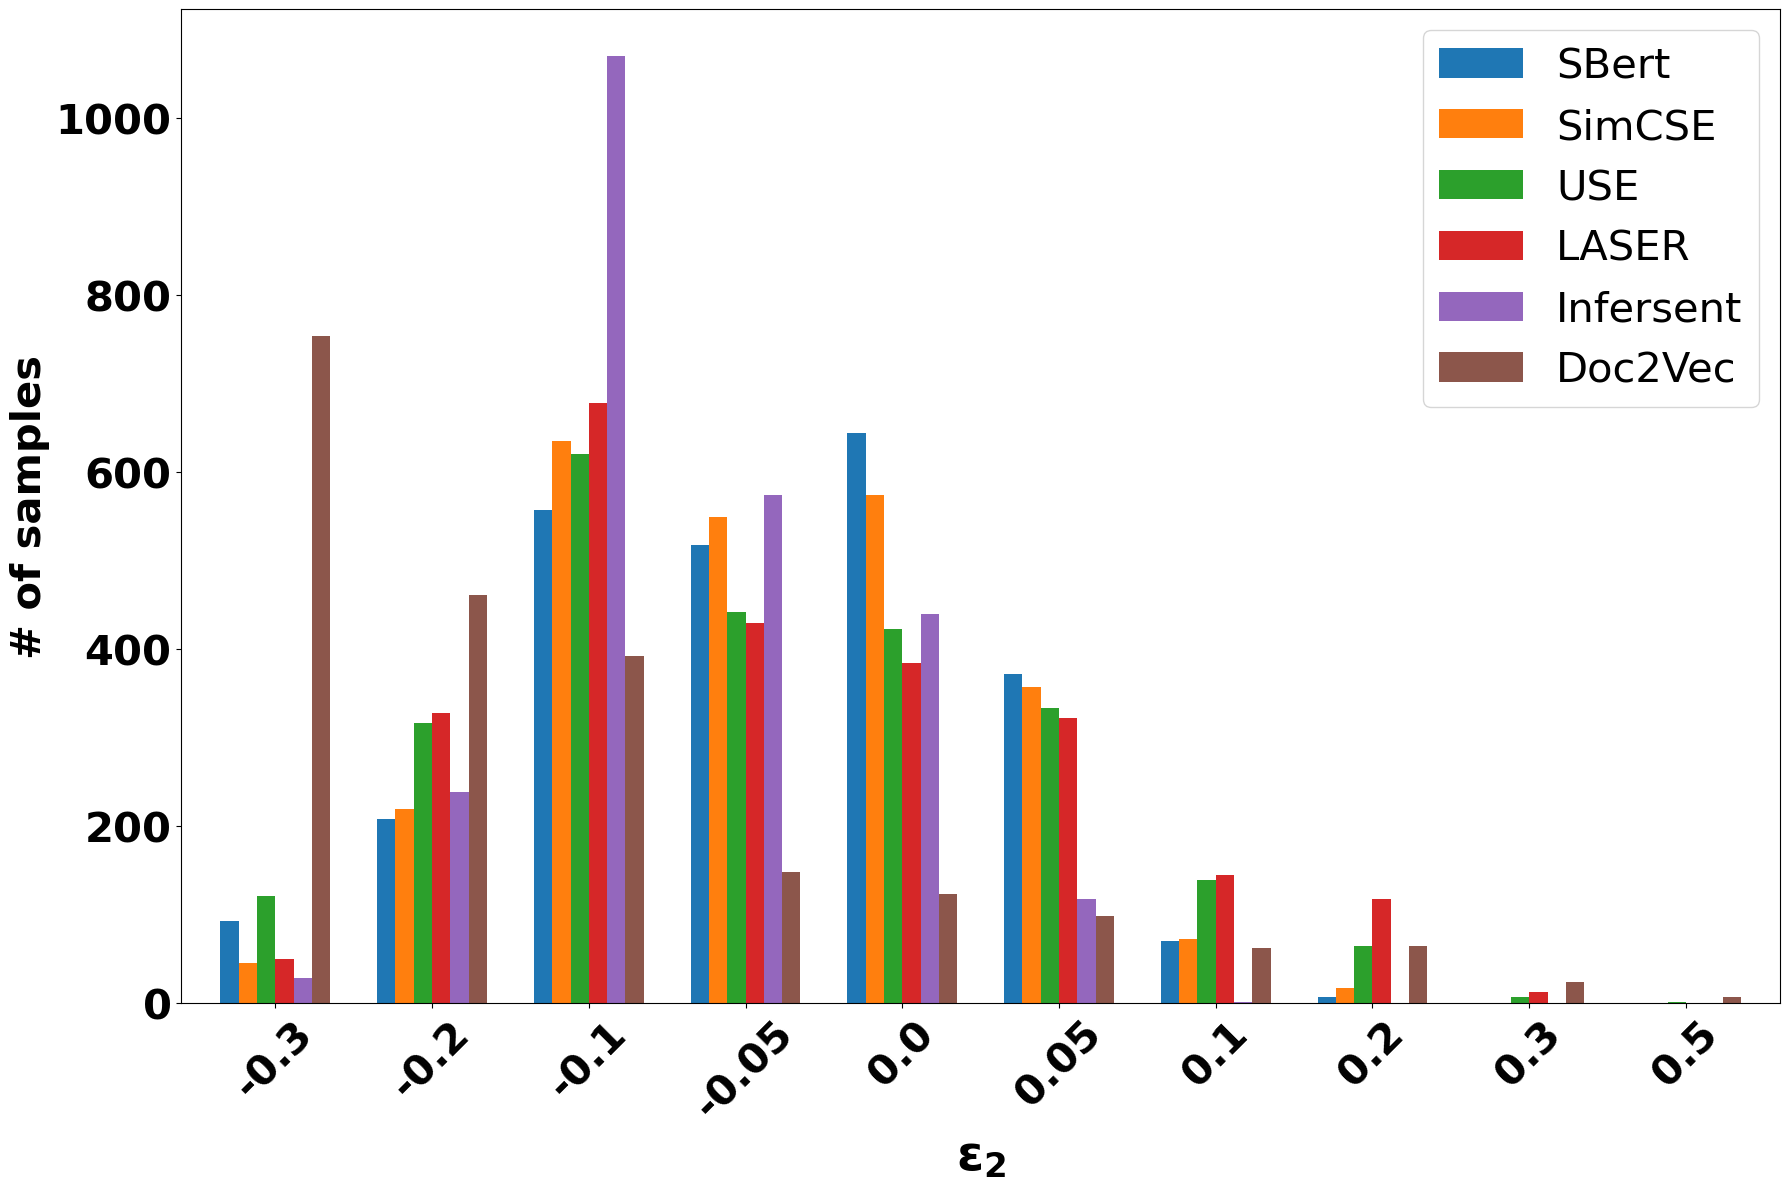

In [48]:
plot_counts_check(df_jumbling_qqp_n1,task="Jumbling_QQP",n=1,save=False)

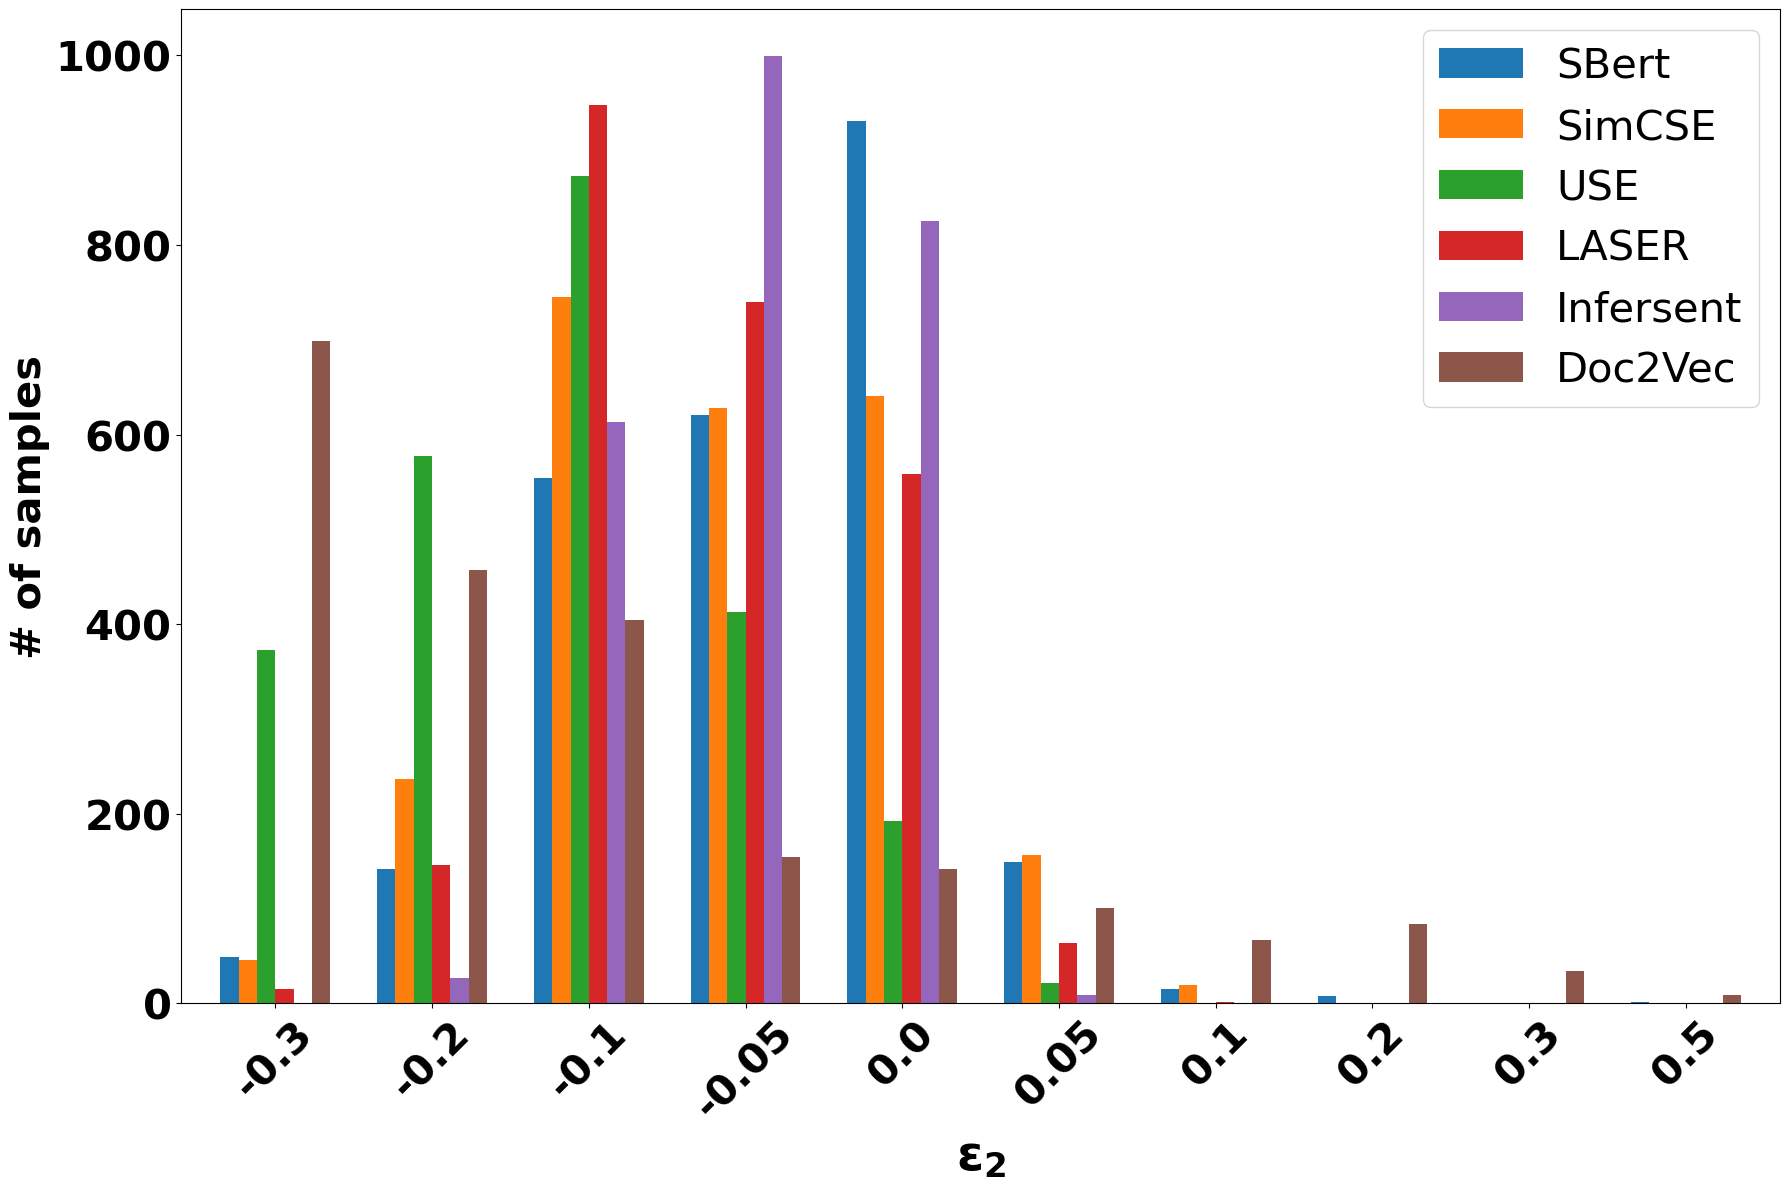

In [50]:
plot_counts_check(df_jumbling_mrpc_n1,task="Jumbling_MRPC",n=1,save=False)

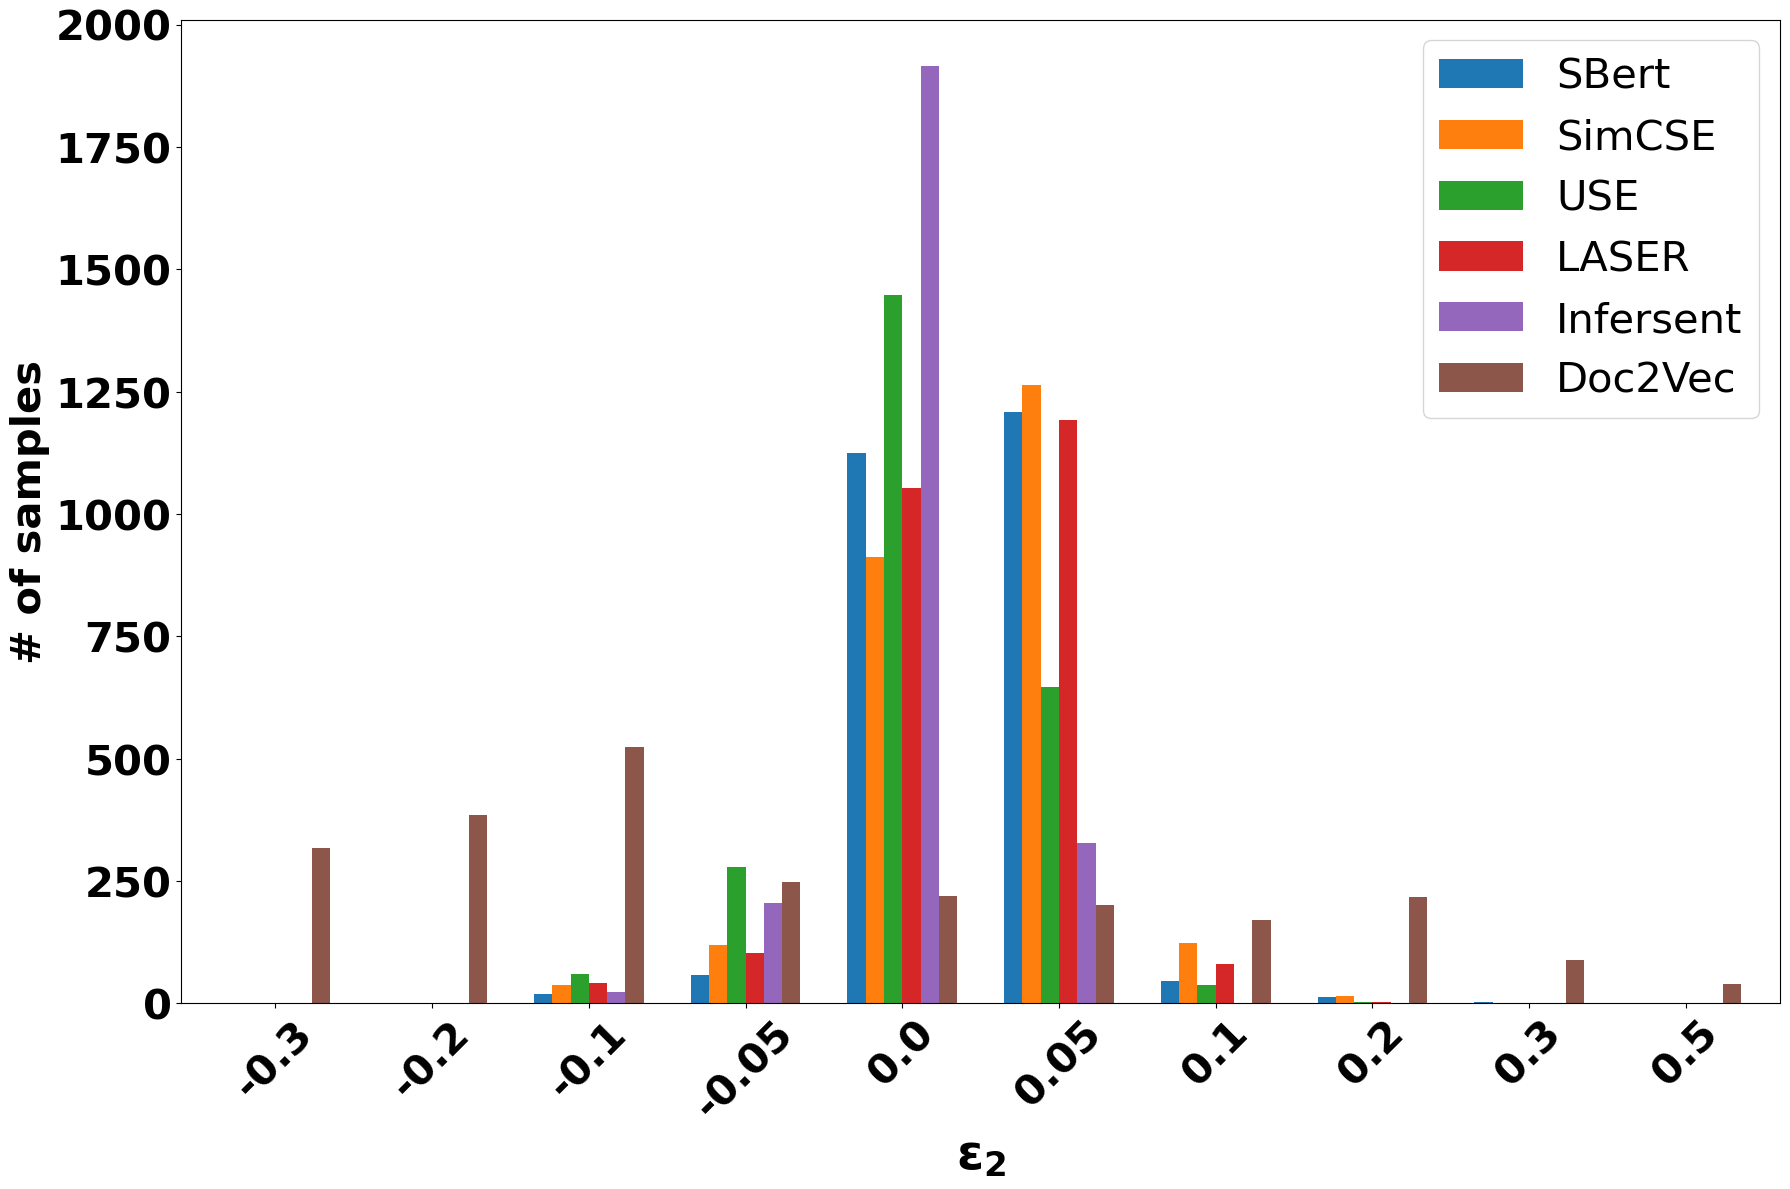

In [51]:
plot_counts_check(df_jumbling_paws_n1,task="Jumbling_PAWS",n=1,save=False)

### n = 2

In [52]:
classic_jumbling_qqp_n2=dict(
    SBert= [data_jumbling[(data_jumbling["sbert_qqp_jumbling_data_n2"]>=eps[i]) & (data_jumbling["sbert_qqp_jumbling_data_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    SimCSE= [data_jumbling[(data_jumbling["simcse_qqp_jumbling_n2"]>=eps[i]) & (data_jumbling["simcse_qqp_jumbling_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    USE= [data_jumbling[(data_jumbling["use_qqp_jumbling_n2"]>=eps[i]) & (data_jumbling["use_qqp_jumbling_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    LASER= [data_jumbling[(data_jumbling["laser_qqp_jumbling_n2"]>=eps[i]) & (data_jumbling["laser_qqp_jumbling_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Infersent= [data_jumbling[(data_jumbling["infer_qqp_jumbling_n2"]>=eps[i]) & (data_jumbling["infer_qqp_jumbling_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Doc2Vec= [data_jumbling[(data_jumbling["doc_jumbling_qqp_n2"]>=eps[i]) & (data_jumbling["doc_jumbling_qqp_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)]
)
df_jumbling_qqp_n2 = pd.DataFrame(classic_jumbling_qqp_n2,index=eps[1:])

In [54]:
classic_jumbling_mrpc_n2=dict(
    SBert= [data_jumbling[(data_jumbling["sbert_mrpc_jumbling_data_n2"]>=eps[i]) & (data_jumbling["sbert_mrpc_jumbling_data_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    SimCSE= [data_jumbling[(data_jumbling["simcse_mrpc_jumbling_n1"]>=eps[i]) & (data_jumbling["simcse_mrpc_jumbling_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    USE= [data_jumbling[(data_jumbling["use_mrpc_jumbling_n2"]>=eps[i]) & (data_jumbling["use_mrpc_jumbling_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    LASER= [data_jumbling[(data_jumbling["laser_mrpc_jumbling_n2"]>=eps[i]) & (data_jumbling["laser_mrpc_jumbling_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Infersent= [data_jumbling[(data_jumbling["infer_mrpc_jumbling_n2"]>=eps[i]) & (data_jumbling["infer_mrpc_jumbling_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Doc2Vec= [data_jumbling[(data_jumbling["doc_jumbling_mrpc_n2"]>=eps[i]) & (data_jumbling["doc_jumbling_mrpc_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)]
)
df_jumbling_mrpc_n2 = pd.DataFrame(classic_jumbling_mrpc_n2,index=eps[1:])

In [55]:
classic_jumbling_paws_n2=dict(
    SBert= [data_jumbling[(data_jumbling["sbert_paws_jumbling_data_n2"]>=eps[i]) & (data_jumbling["sbert_paws_jumbling_data_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    SimCSE= [data_jumbling[(data_jumbling["simcse_paws_jumbling_n2"]>=eps[i]) & (data_jumbling["simcse_paws_jumbling_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    USE= [data_jumbling[(data_jumbling["use_paws_jumbling_n2"]>=eps[i]) & (data_jumbling["use_paws_jumbling_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    LASER= [data_jumbling[(data_jumbling["laser_paws_jumbling_n2"]>=eps[i]) & (data_jumbling["laser_paws_jumbling_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Infersent= [data_jumbling[(data_jumbling["infer_paws_jumbling_n2"]>=eps[i]) & (data_jumbling["infer_paws_jumbling_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Doc2Vec= [data_jumbling[(data_jumbling["doc_jumbling_paws_n2"]>=eps[i]) & (data_jumbling["doc_jumbling_paws_n2"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)]
)
df_jumbling_paws_n2 = pd.DataFrame(classic_jumbling_paws_n2,index=eps[1:])

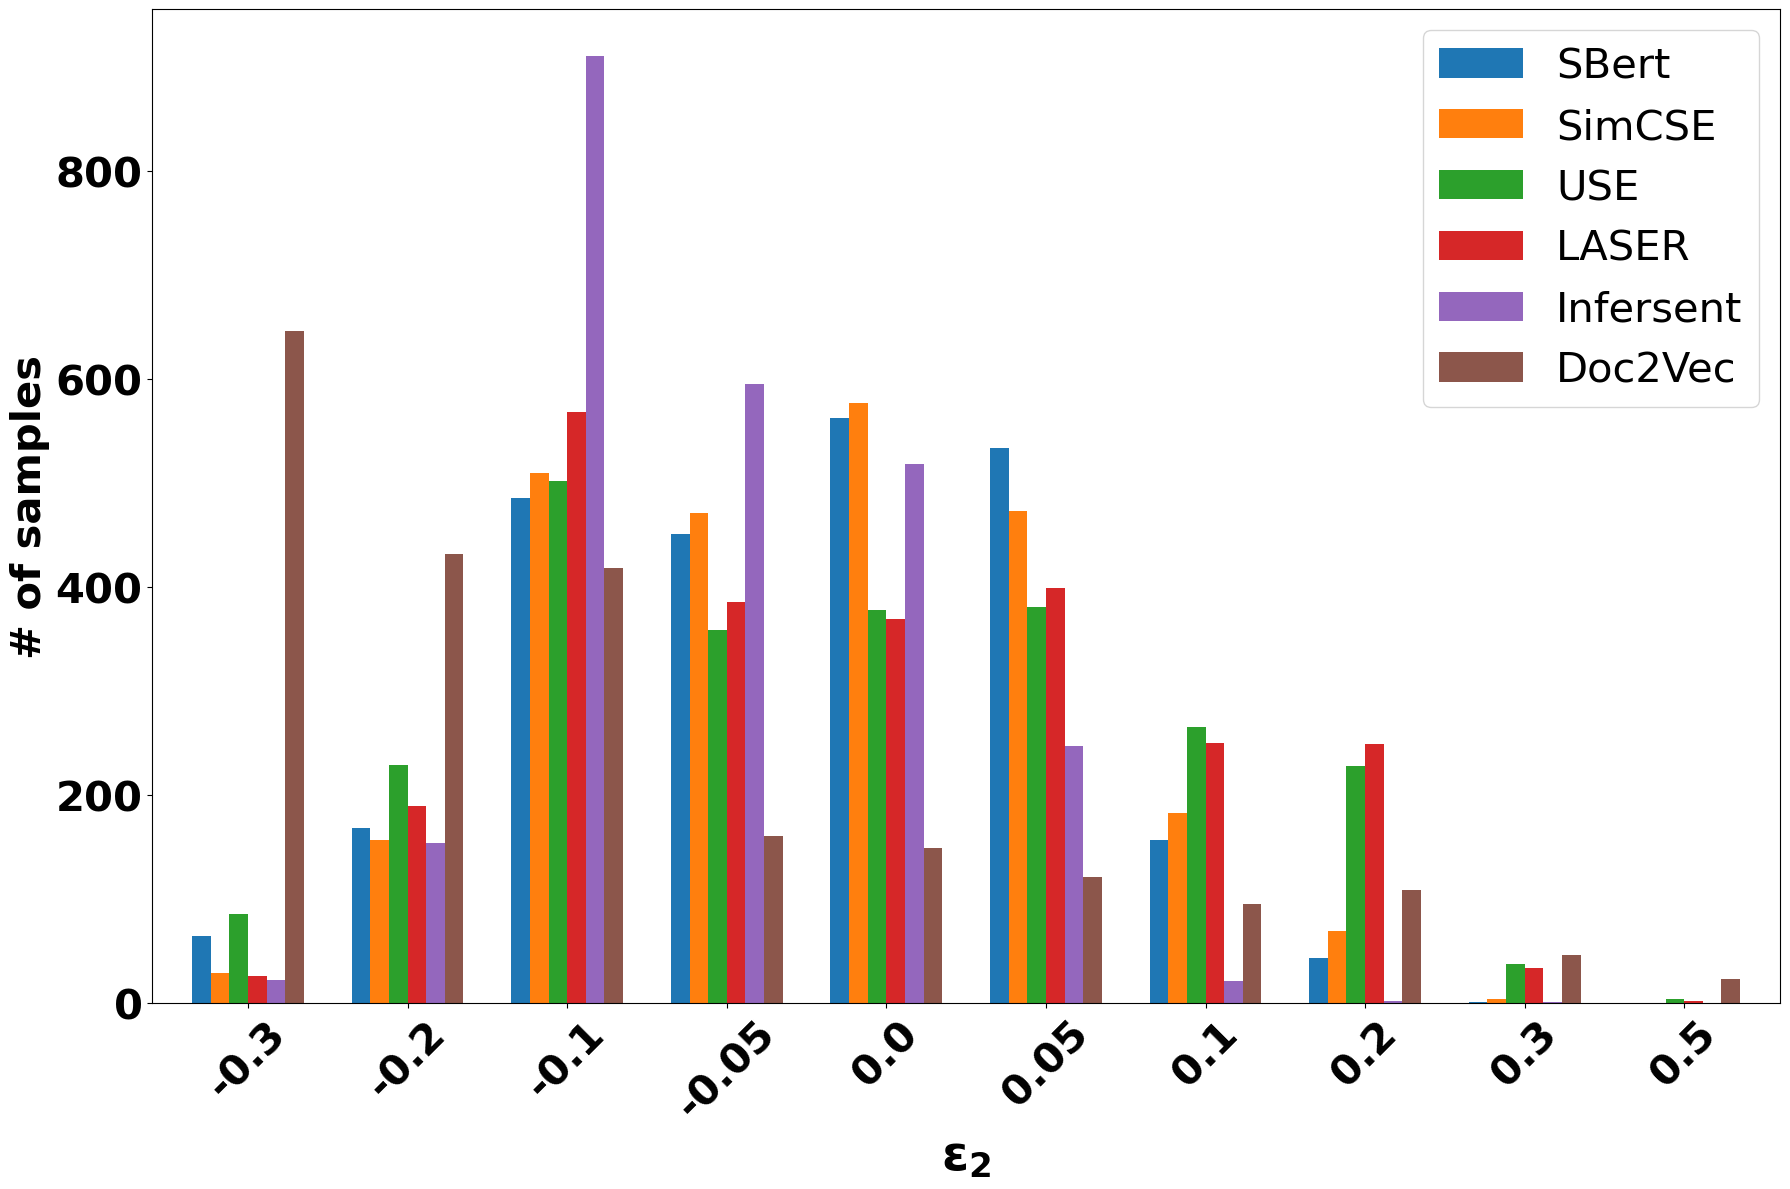

In [57]:
plot_counts_check(df_jumbling_qqp_n2,task="Jumbling_QQP",n=2,save=False)

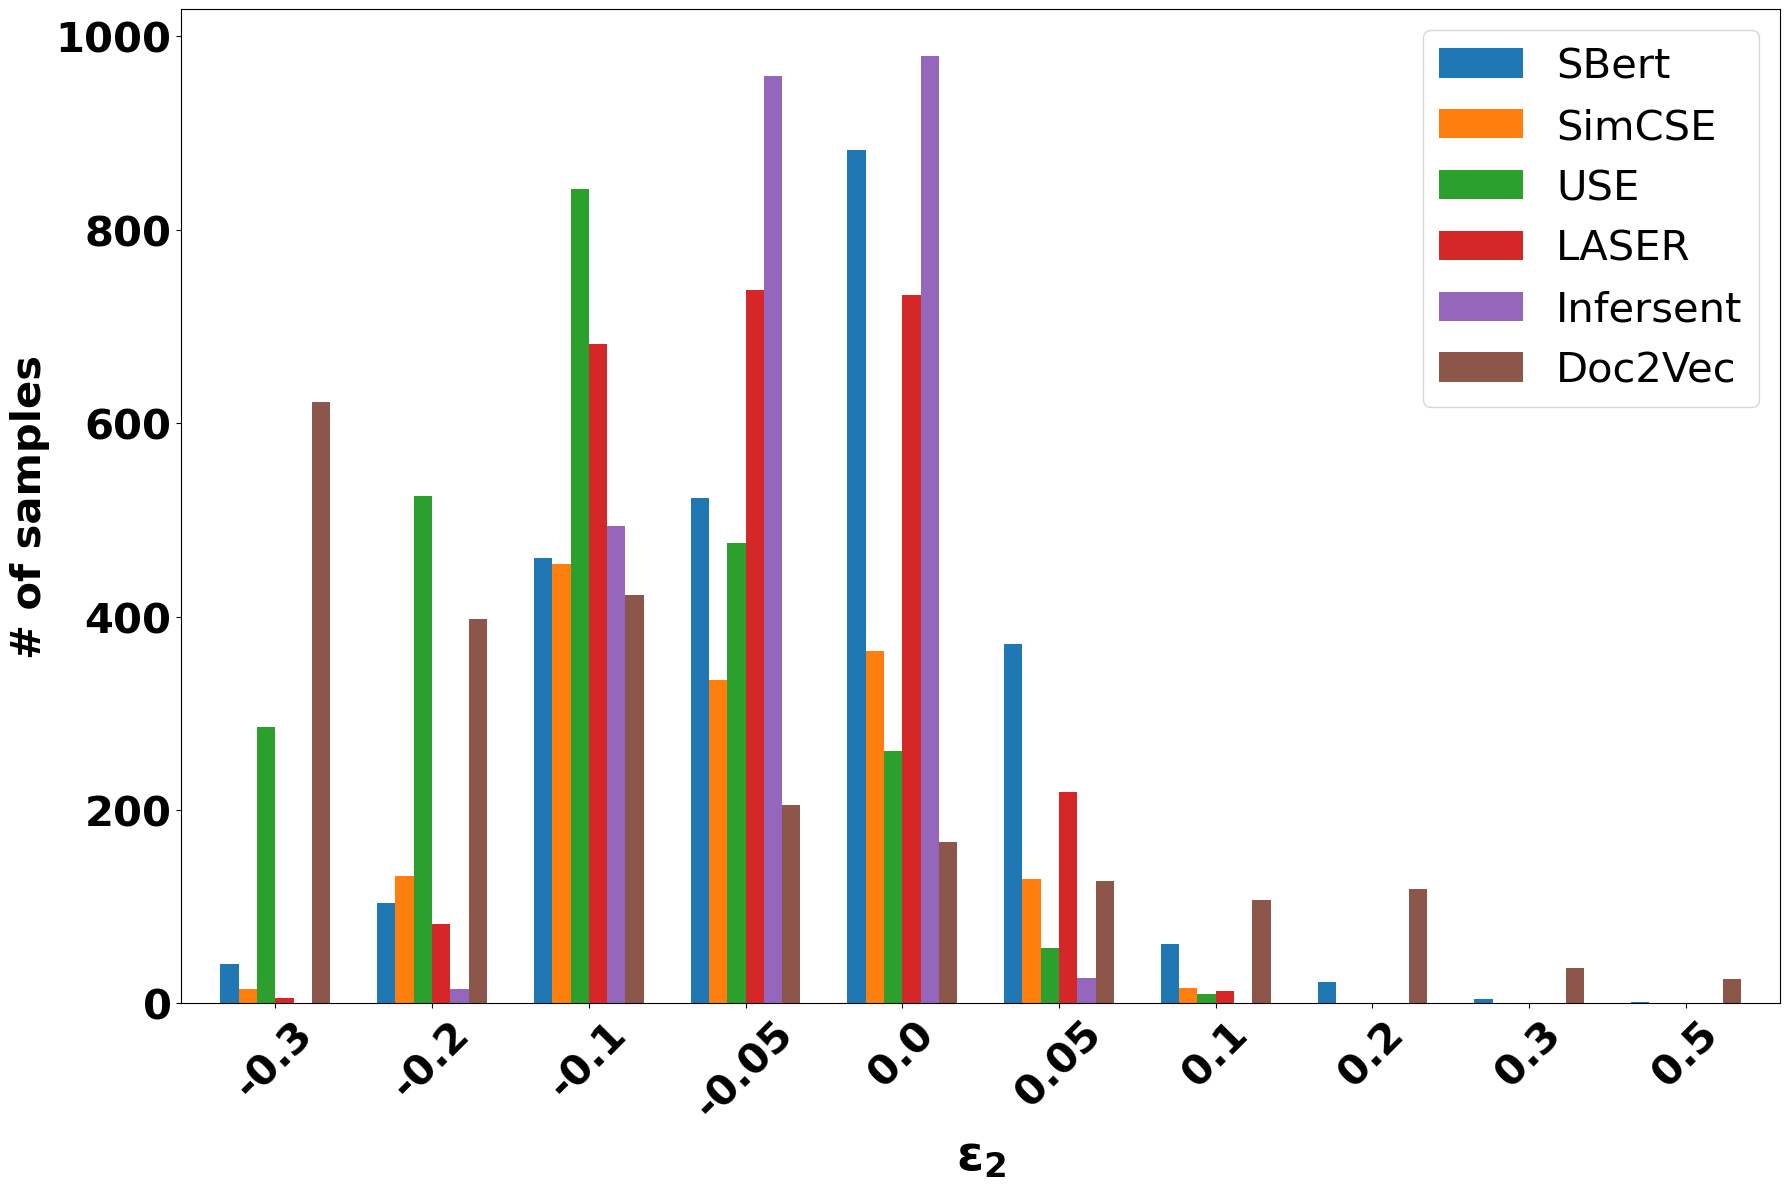

In [58]:
plot_counts_check(df_jumbling_mrpc_n2,task="Jumbling_MRPC",n=2,save=False)

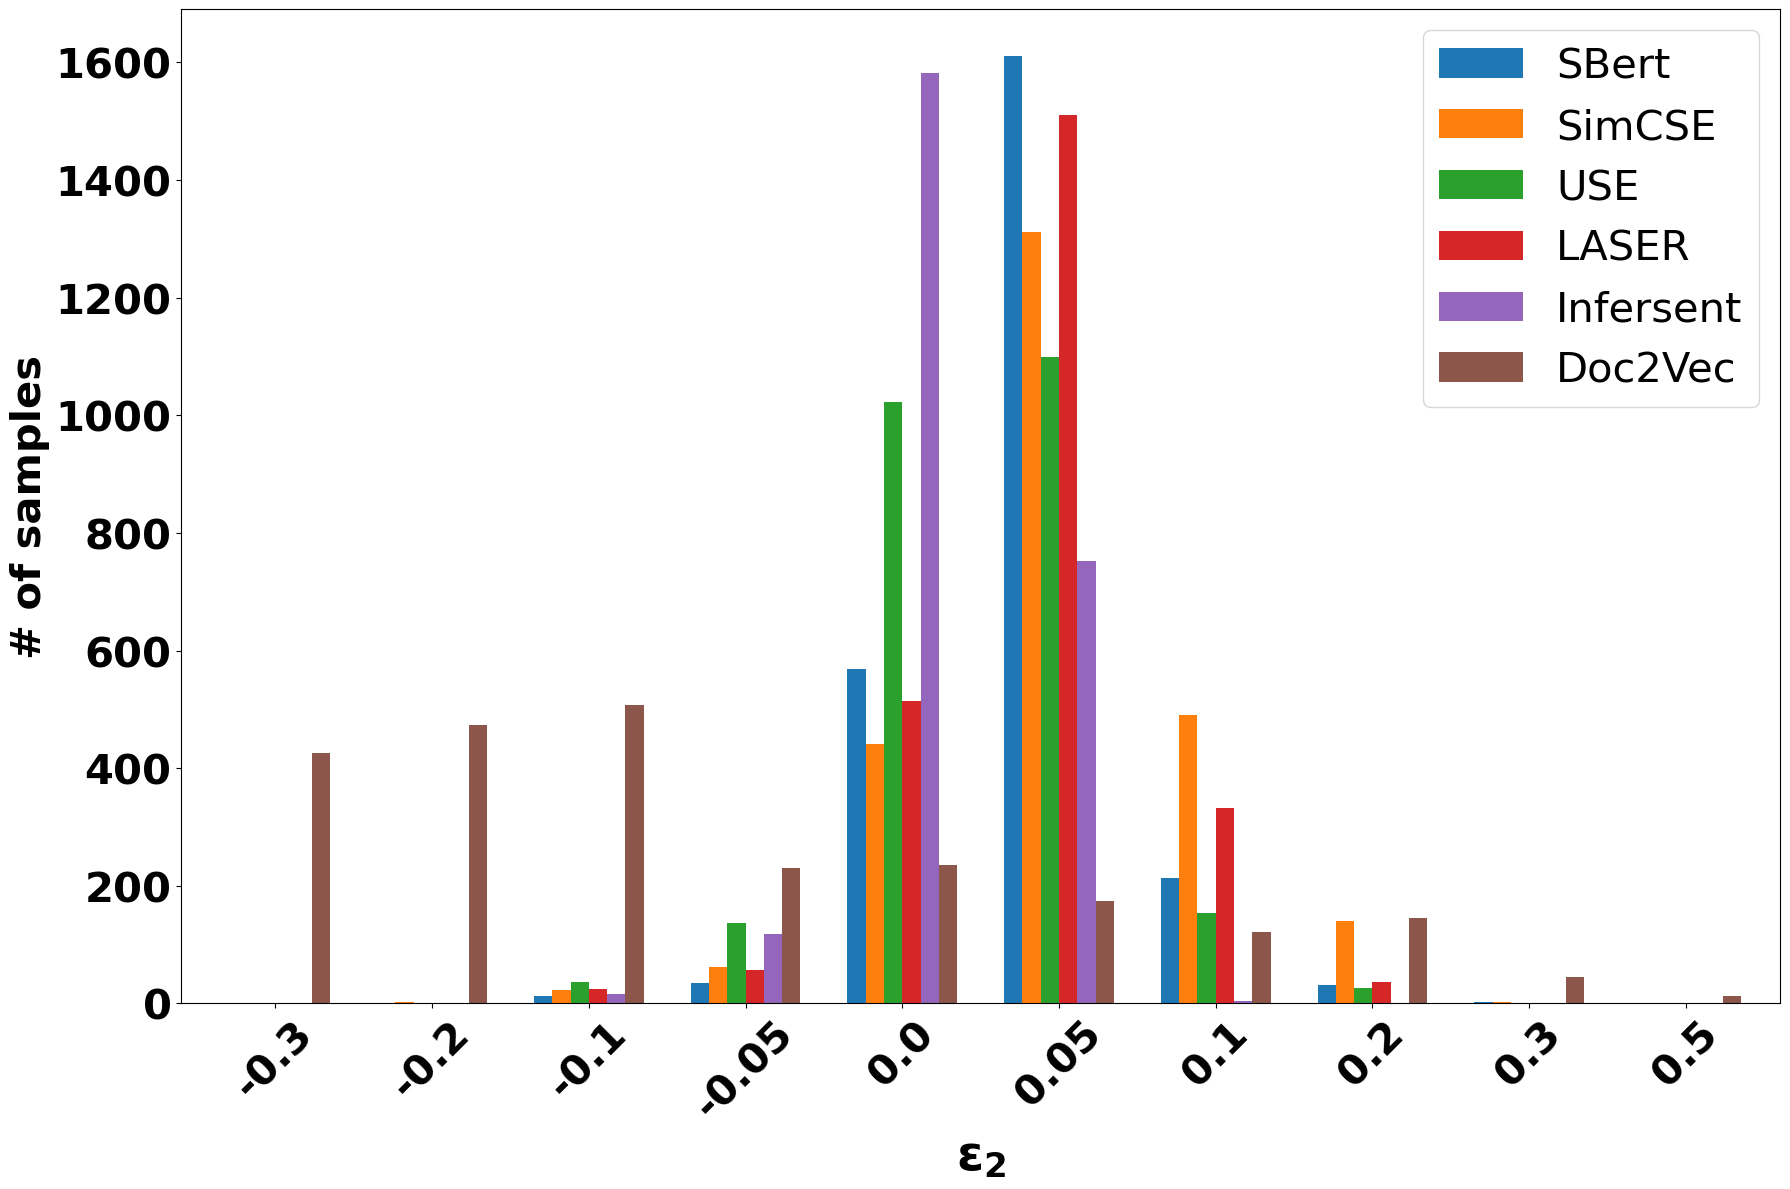

In [59]:
plot_counts_check(df_jumbling_paws_n2,task="Jumbling_PAWS",n=2,save=False)

### n = 3

In [62]:
data_jumbling_n3 = pd.read_csv("/data/yash/Encoder-Evaluation/data/all_model_diff_value_n3.csv")

In [78]:
# data_jumbling_n3.to_csv("/data/yash/Encoder-Evaluation/data/all_model_diff_value_n3_v2.csv")

In [63]:
data_jumbling_n3["simcse_mrpc_jumbling_n3"] = sim_mrpc["diff_org_n3"]
data_jumbling_n3["simcse_qqp_jumbling_n3"] = sim_qqp["diff_org_n3"]
data_jumbling_n3["simcse_paws_jumbling_n3"] = sim_paws["diff_org_n3"]


In [92]:
data_jumbling_n3.columns

Index(['Unnamed: 0', 'doc_mrpc_jumbling_diff', 'doc_qqp_jumbling_diff',
       'doc_pawsc_jumbling_diff', 'infer_mrpc_jumbling_diff',
       'infer_qqp_jumbling_diff', 'infer_paws_jumbling_diff',
       'laser_paws_jumbling_diff', 'laser_mrpc_jumbling_diff',
       'laser_qqp_jumbling_diff ', 'sbert_mrpc_jumbling_diff',
       'sbert_qqp_jumbling_diff ', 'sbert_paws_jumbling_diff',
       'doc_mrpc_anto_diff', 'doc_qqp_anto_diff', 'doc_paws_anto_diff',
       'infer_mrpc_anto_diff', 'infer_qqp_anto_diff', 'infer_paws_anto_diff',
       'laser_paws_anto_diff', 'laser_qqp_anto_diff', 'laser_mrpc_anto_diff',
       'use_paws_anto_diff', 'use_mrpc_anto_diff', 'use_qqp_anto_diff',
       'sbert_mrpc_anto_diff', 'sbert_qqp_anto_diff', 'sbert_paws_anto_diff',
       'use_paws_jumbling_diff', 'use_mrpc_jumbling_diff',
       'use_qqp_jumbling_diff', 'laser_qqp_jumbling_diff',
       'sbert_qqp_jumbling_diff'],
      dtype='object')

In [64]:
classic_jumbling_qqp_n3=dict(
    SBert= [data_jumbling_n3[(data_jumbling_n3["sbert_qqp_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["sbert_qqp_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    SimCSE= [data_jumbling[(data_jumbling["simcse_qqp_jumbling_n3"]>=eps[i]) & (data_jumbling["simcse_qqp_jumbling_n3"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    USE= [data_jumbling_n3[(data_jumbling_n3["use_qqp_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["use_qqp_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    LASER= [data_jumbling_n3[(data_jumbling_n3["laser_qqp_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["laser_qqp_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Infersent= [data_jumbling_n3[(data_jumbling_n3["infer_qqp_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["infer_qqp_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Doc2Vec= [data_jumbling_n3[(data_jumbling_n3["doc_qqp_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["doc_qqp_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)]
)
df_jumbling_qqp_n3 = pd.DataFrame(classic_jumbling_qqp_n3,index=eps[1:])

In [65]:
classic_jumbling_mrpc_n3=dict(
    SBert= [data_jumbling_n3[(data_jumbling_n3["sbert_mrpc_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["sbert_mrpc_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    SimCSE= [data_jumbling[(data_jumbling["simcse_mrpc_jumbling_n3"]>=eps[i]) & (data_jumbling["simcse_mrpc_jumbling_n3"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    USE= [data_jumbling_n3[(data_jumbling_n3["use_mrpc_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["use_mrpc_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    LASER= [data_jumbling_n3[(data_jumbling_n3["laser_mrpc_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["laser_mrpc_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Infersent= [data_jumbling_n3[(data_jumbling_n3["infer_mrpc_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["infer_mrpc_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Doc2Vec= [data_jumbling_n3[(data_jumbling_n3["doc_mrpc_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["doc_mrpc_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)]
)
df_jumbling_mrpc_n3 = pd.DataFrame(classic_jumbling_mrpc_n3,index=eps[1:])

In [66]:
classic_jumbling_paws_n3=dict(
    SBert= [data_jumbling_n3[(data_jumbling_n3["sbert_paws_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["sbert_paws_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    SimCSE= [data_jumbling[(data_jumbling["simcse_paws_jumbling_n3"]>=eps[i]) & (data_jumbling["simcse_paws_jumbling_n3"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    USE= [data_jumbling_n3[(data_jumbling_n3["use_paws_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["use_paws_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    LASER= [data_jumbling_n3[(data_jumbling_n3["laser_paws_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["laser_paws_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Infersent= [data_jumbling_n3[(data_jumbling_n3["infer_paws_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["infer_paws_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Doc2Vec= [data_jumbling_n3[(data_jumbling_n3["doc_pawsc_jumbling_diff"]>=eps[i]) & (data_jumbling_n3["doc_pawsc_jumbling_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)]
)
df_jumbling_paws_n3 = pd.DataFrame(classic_jumbling_paws_n3,index=eps[1:])

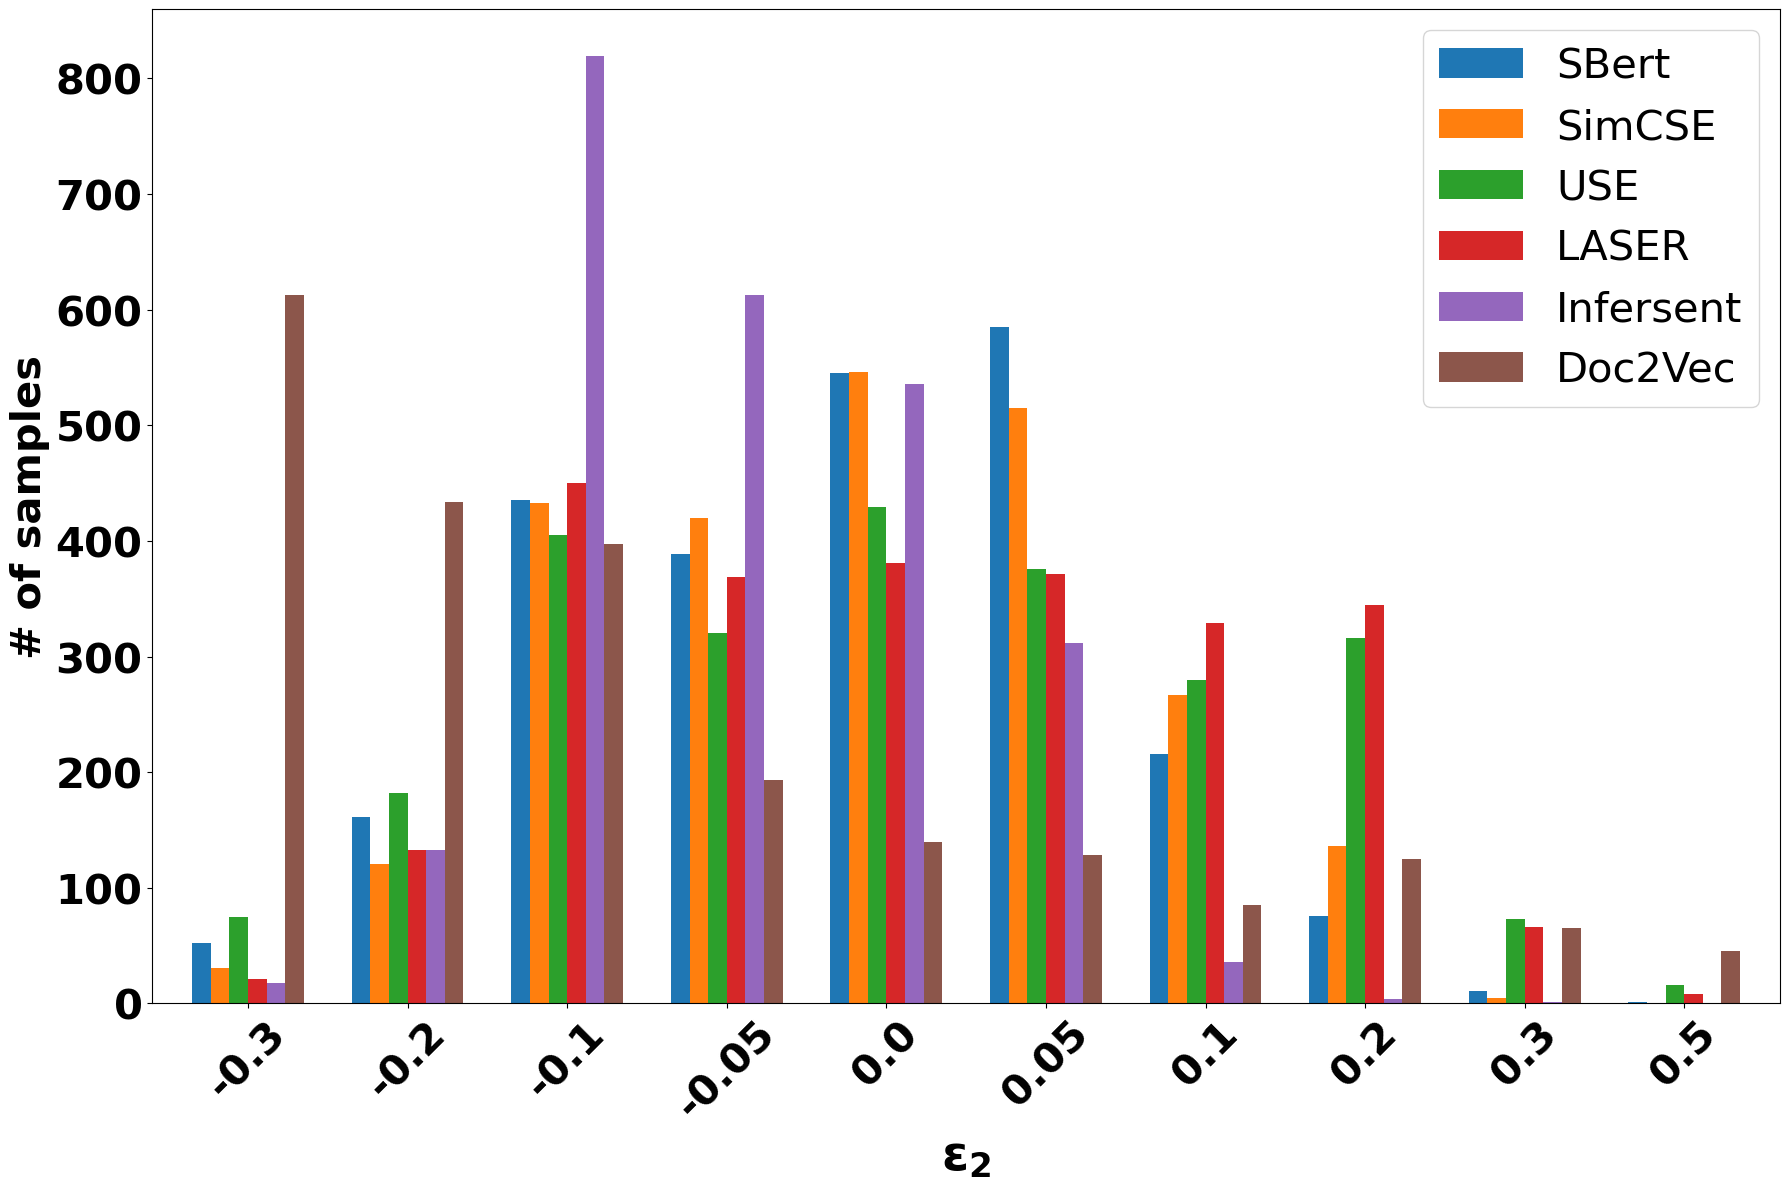

In [67]:
plot_counts_check(df_jumbling_qqp_n3,task="Jumbling_QQP",n=3,save=False)

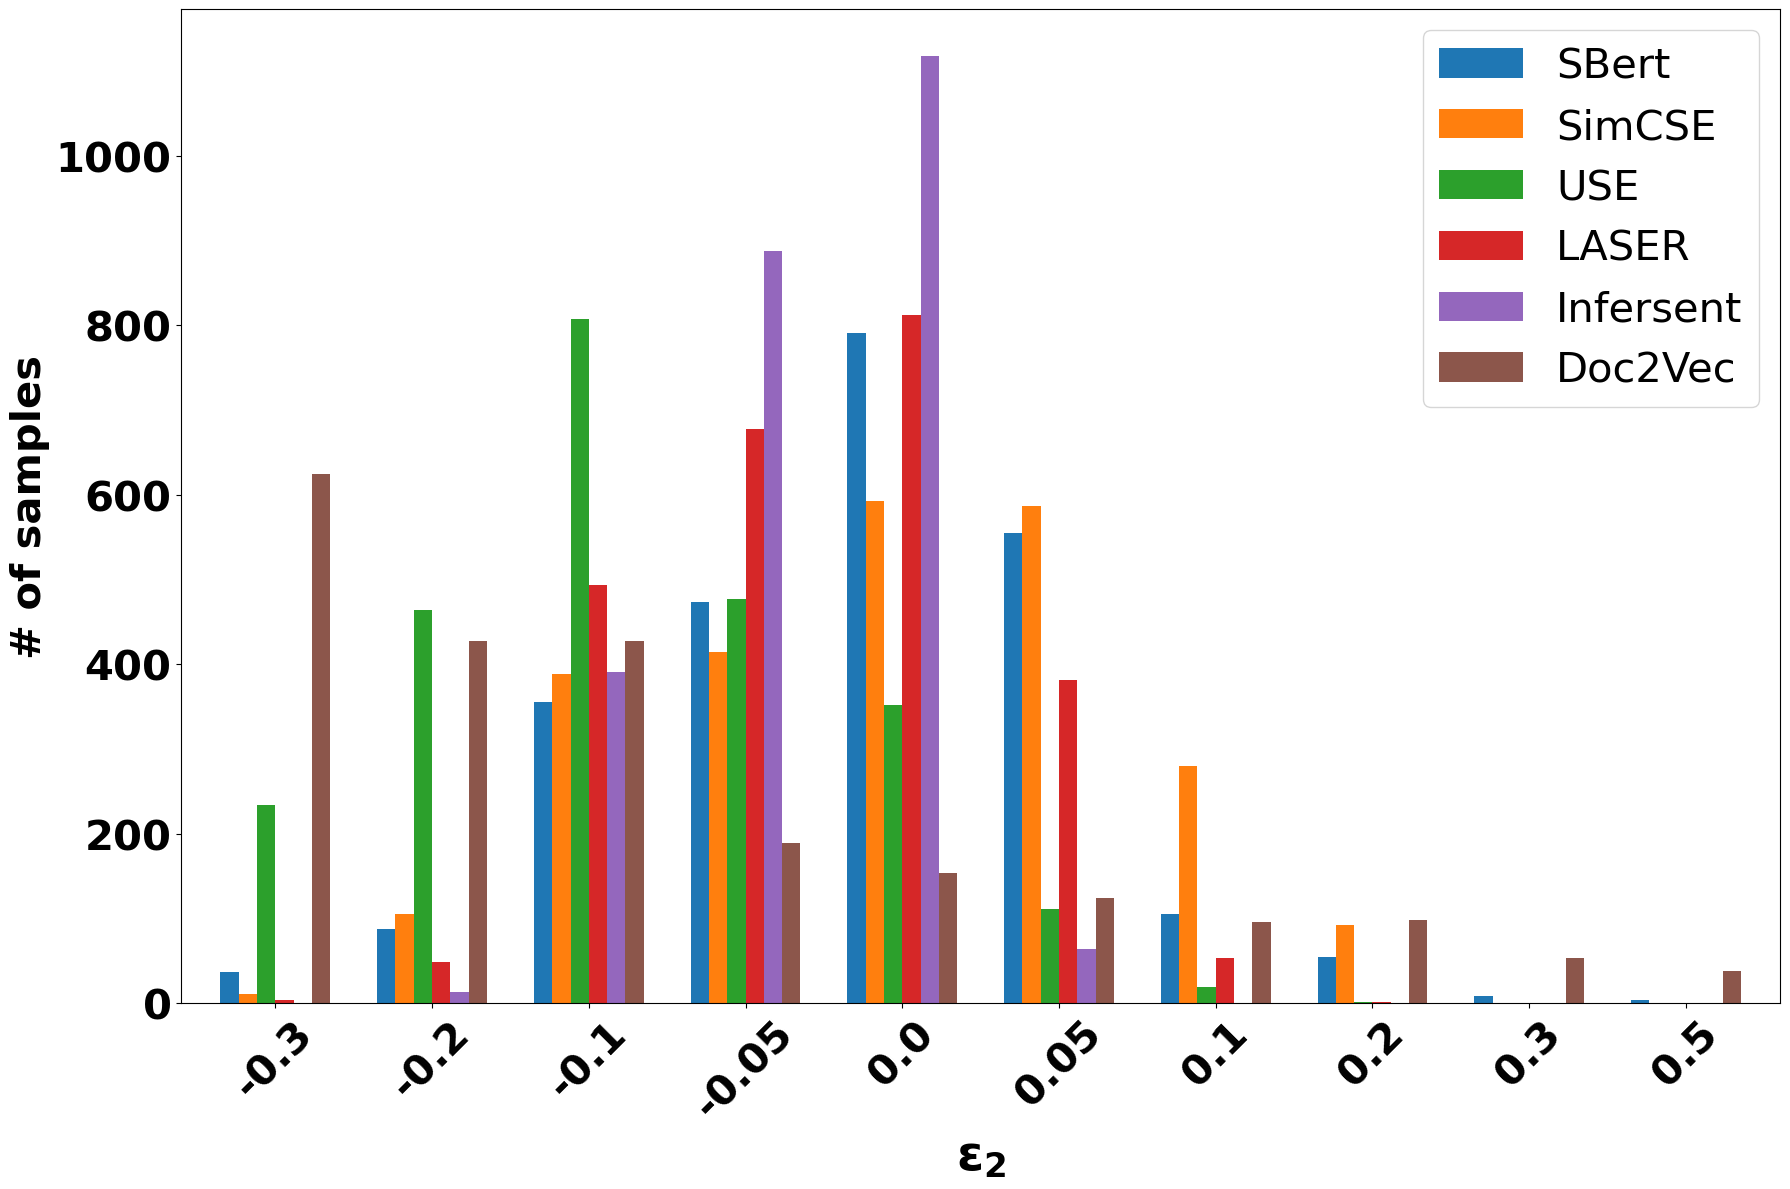

In [69]:
plot_counts_check(df_jumbling_mrpc_n3,task="Jumbling_MRPC",n=3,save=False)

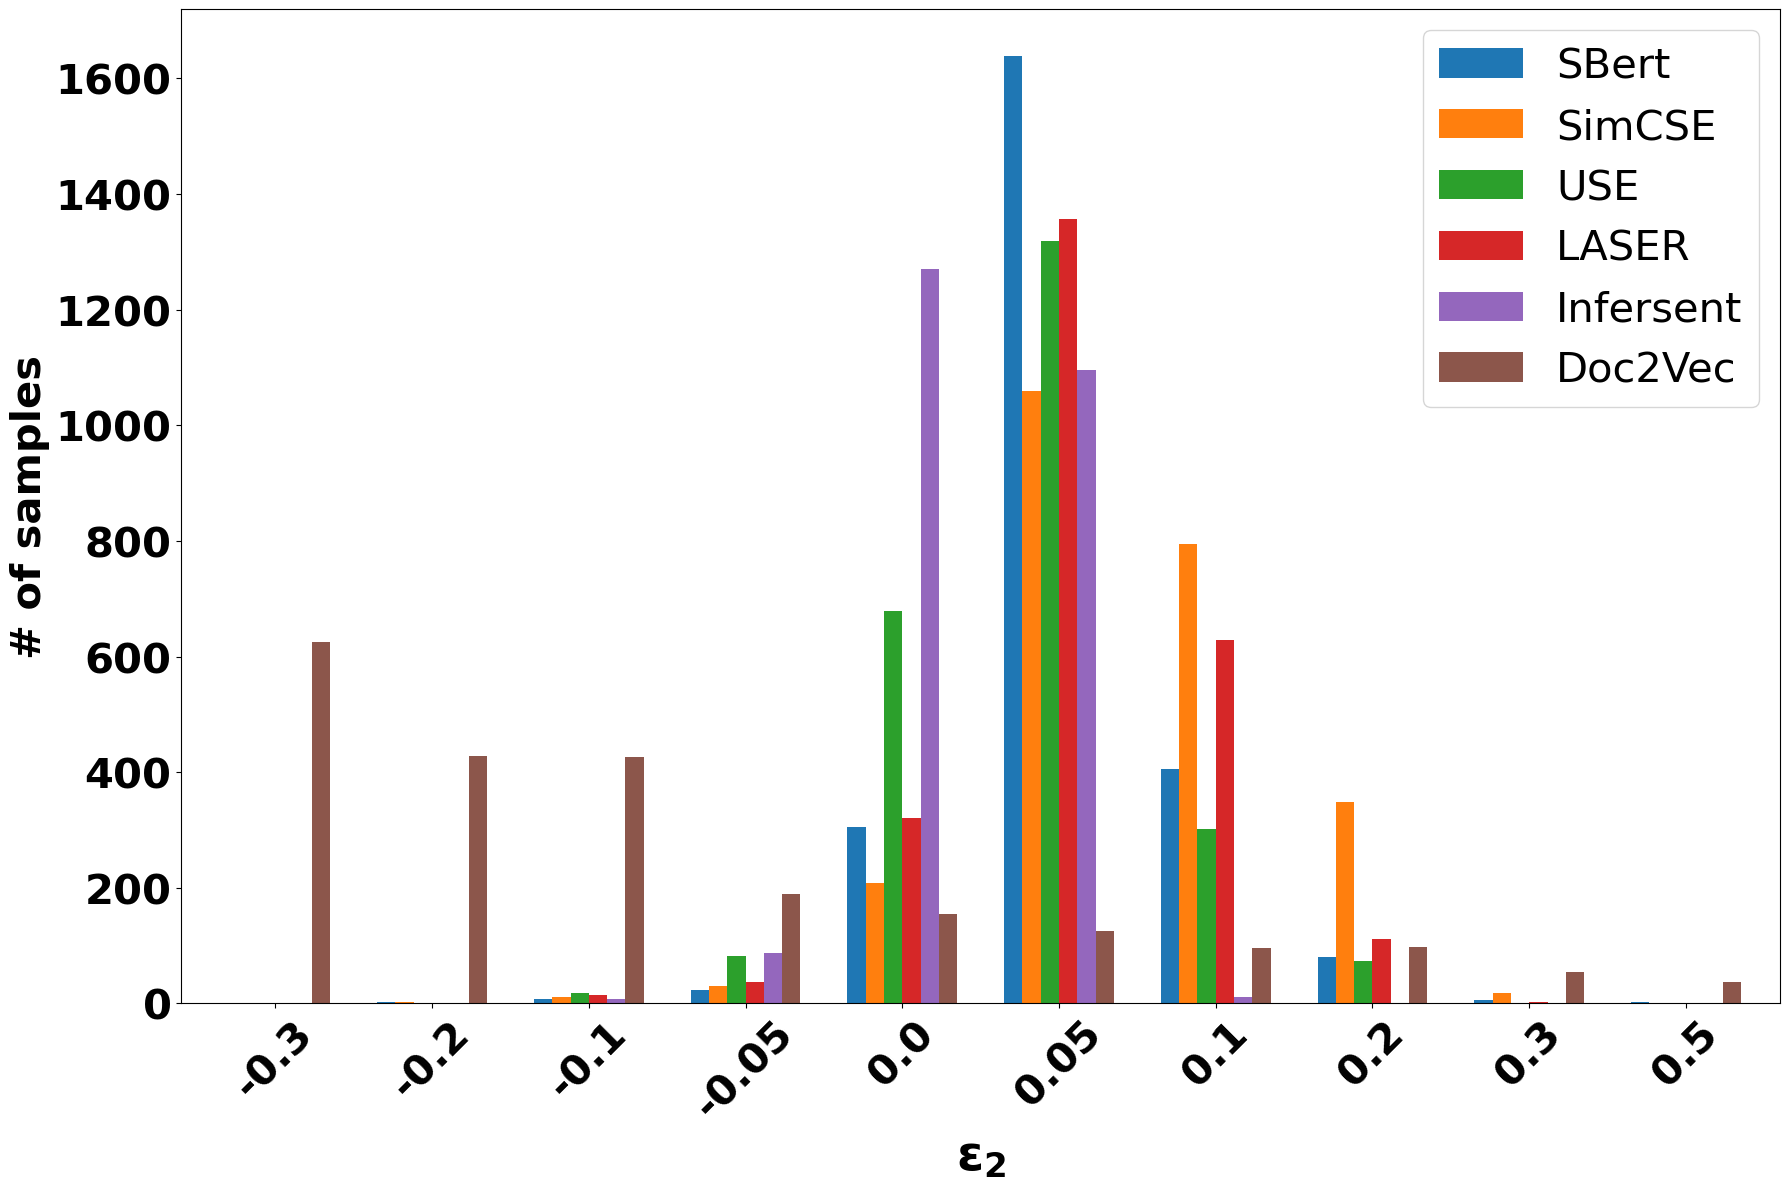

In [70]:
plot_counts_check(df_jumbling_paws_n3,task="Jumbling_PAWS",n=3,save=False)

## Antonymx

In [121]:
data_anto = pd.read_csv("/data/yash/Encoder-Evaluation/data/all_anto_model_diff.csv")
# /home/yash/Probing-Sentence-Encoder/data/all_model_diff_value_n3.csv

In [120]:
# data_anto.to_csv("/data/yash/Encoder-Evaluation/data/all_anto_model_diff.csv")

In [106]:
data_anto.rename(columns={"simcse_mrpc_diff":"simcse_mrpc_diff_anto","simcse_qqp_diff":"simcse_qqp_diff_anto","simcse_paws_diff":"simcse_paws_diff_anto"},inplace=True)

In [122]:
data_anto.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'doc_mrpc_jumbling_diff',
       'doc_qqp_jumbling_diff', 'doc_pawsc_jumbling_diff',
       'infer_mrpc_jumbling_diff', 'infer_qqp_jumbling_diff',
       'infer_paws_jumbling_diff', 'laser_paws_jumbling_diff',
       'laser_mrpc_jumbling_diff', 'laser_qqp_jumbling_diff ',
       'sbert_mrpc_jumbling_diff', 'sbert_qqp_jumbling_diff ',
       'sbert_paws_jumbling_diff', 'doc_mrpc_anto_diff', 'doc_qqp_anto_diff',
       'doc_paws_anto_diff', 'infer_mrpc_anto_diff', 'infer_qqp_anto_diff',
       'infer_paws_anto_diff', 'laser_paws_anto_diff', 'laser_qqp_anto_diff',
       'laser_mrpc_anto_diff', 'use_paws_anto_diff', 'use_mrpc_anto_diff',
       'use_qqp_anto_diff', 'sbert_mrpc_anto_diff', 'sbert_qqp_anto_diff',
       'sbert_paws_anto_diff', 'use_paws_jumbling_diff',
       'use_mrpc_jumbling_diff', 'use_qqp_jumbling_diff',
       'laser_qqp_jumbling_diff', 'sbert_qqp_jumbling_diff',
       'simcse_mrpc_diff_ant0', 'simcse_qqp_diff_anto

In [112]:
sim_mrpc_anto = pd.read_csv("/data/yash/Encoder-Evaluation/llm_results/simcse/anto/anto_mrpc.csv")
sim_qqp_anto = pd.read_csv("/data/yash/Encoder-Evaluation/llm_results/simcse/anto/anto_qqp.csv")
sim_paws_anto = pd.read_csv("/data/yash/Encoder-Evaluation/llm_results/simcse/anto/anto_paws.csv")

In [89]:
data_anto.head()

,Unnamed: 0,doc_mrpc_jumbling_diff,doc_qqp_jumbling_diff,doc_pawsc_jumbling_diff,infer_mrpc_jumbling_diff,infer_qqp_jumbling_diff,infer_paws_jumbling_diff,laser_paws_jumbling_diff,laser_mrpc_jumbling_diff,laser_qqp_jumbling_diff,...,use_mrpc_anto_diff,use_qqp_anto_diff,sbert_mrpc_anto_diff,sbert_qqp_anto_diff,sbert_paws_anto_diff,use_paws_jumbling_diff,use_mrpc_jumbling_diff,use_qqp_jumbling_diff,laser_qqp_jumbling_diff,sbert_qqp_jumbling_diff
0,0,-0.146940,-0.725832,-0.146940,-0.037868,-0.135362,-0.036731,0.026418,-0.003242,-0.201509,...,-0.032159,-0.001224,0.129034,0.190947,0.082900,-0.017994,-0.050671,-0.256541,-0.201509,-0.153974
1,1,-0.530788,-0.573778,-0.530788,-0.040660,-0.054586,-0.051094,-0.037340,-0.104090,-0.094873,...,-0.149491,-0.040064,-0.059015,0.030028,0.359508,0.038703,-0.084517,-0.027640,-0.094873,0.081156
2,2,0.053308,-0.622328,0.053308,-0.049043,-0.085320,-0.036351,-0.039023,-0.113236,-0.229262,...,-0.285418,0.047086,-0.078210,-0.024481,0.017606,-0.041089,-0.175191,-0.059589,-0.229262,-0.381417
3,3,-0.180473,-0.231004,-0.180473,-0.077037,-0.092234,0.035919,0.046208,-0.125088,-0.126034,...,-0.274635,-0.103435,0.103097,-0.035168,-0.000811,0.035370,-0.219220,-0.086021,-0.126034,-0.077457
4,4,-0.145365,0.147967,-0.145365,-0.134551,-0.080178,-0.027876,-0.007504,-0.077289,0.048628,...,-0.224603,-0.025106,0.043371,-0.028705,0.069883,0.007859,-0.330065,-0.042531,0.048628,-0.012748


In [90]:
sim_mrpc_anto.head()

,Unnamed: 0,original_sentence,paraphrased,antonym,sim_org_para,sim_org_anto,diff_org_para
0,0,"Amrozi accused his brother , whom he called "" ...","Referring to him as only "" the witness "" , Amr...","Amrozi accused his sister , whom he called "" t...",0.936114,0.938066,-0.001952
1,1,They had published an advertisement on the Int...,"On June 10 , the ship 's owners had published ...",They had published an advertisement on the Int...,0.855047,0.970345,-0.115298
2,2,"The stock rose $ 2.11 , or about 11 percent , ...",PG & E Corp. shares jumped $ 1.63 or 8 percent...,"The stock rose $ 2.11 , or about 11 percent , ...",0.761469,0.991582,-0.230113
3,3,Revenue in the first quarter of the year dropp...,With the scandal hanging over Stewart 's compa...,Revenue in the first quarter of the year atten...,0.813642,0.813182,0.000460
4,4,The DVD-CCA then appealed to the state Supreme...,The DVD CCA appealed that decision to the U.S....,The DVD-CCA then repel to the state Supreme Co...,0.880326,0.875111,0.005215


In [117]:
data_anto["simcse_mrpc_diff_anto"] = sim_mrpc_anto["diff_org_para"]
data_anto["simcse_qqp_diff_anto"] = sim_qqp_anto["diff_org_para"]
data_anto["simcse_paws_diff_anto"] = sim_paws_anto["diff_org_para"]


In [92]:
classic_anto_qqp_n1=dict(
    SBert= [data_anto[(data_anto["sbert_qqp_anto_diff"]>=eps[i]) & (data_anto["sbert_qqp_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    SimCSE= [data_anto[(data_anto["simcse_qqp_diff"]>=eps[i]) & (data_anto["simcse_qqp_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    USE= [data_anto[(data_anto["use_qqp_anto_diff"]>=eps[i]) & (data_anto["use_qqp_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    LASER= [data_anto[(data_anto["laser_qqp_anto_diff"]>=eps[i]) & (data_anto["laser_qqp_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Infersent= [data_anto[(data_anto["infer_qqp_anto_diff"]>=eps[i]) & (data_anto["infer_qqp_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Doc2Vec= [data_anto[(data_anto["doc_qqp_anto_diff"]>=eps[i]) & (data_anto["doc_qqp_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)]
)
df_anto_qqp_n1 = pd.DataFrame(classic_anto_qqp_n1,index=eps[1:])

In [93]:
classic_mrpc_anto_n1=dict(
    SBert= [data_anto[(data_anto["sbert_mrpc_anto_diff"]>=eps[i]) & (data_anto["sbert_mrpc_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    SimCSE= [data_anto[(data_anto["simcse_mrpc_diff"]>=eps[i]) & (data_anto["simcse_mrpc_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    
    USE= [data_anto[(data_anto["use_mrpc_anto_diff"]>=eps[i]) & (data_anto["use_mrpc_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    LASER= [data_anto[(data_anto["laser_mrpc_anto_diff"]>=eps[i]) & (data_anto["laser_mrpc_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Infersent= [data_anto[(data_anto["infer_mrpc_anto_diff"]>=eps[i]) & (data_anto["infer_mrpc_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Doc2Vec= [data_anto[(data_anto["doc_mrpc_anto_diff"]>=eps[i]) & (data_anto["doc_mrpc_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)]
)
df_anto_mrpc_n1 = pd.DataFrame(classic_mrpc_anto_n1,index=eps[1:])

In [95]:
classic_paws_anto_n1=dict(
    SBert= [data_anto[(data_anto["sbert_paws_anto_diff"]>=eps[i]) & (data_anto["sbert_paws_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    SimCSE= [data_anto[(data_anto["simcse_paws_diff"]>=eps[i]) & (data_anto["simcse_paws_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    
    USE= [data_anto[(data_anto["use_paws_anto_diff"]>=eps[i]) & (data_anto["use_paws_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    LASER= [data_anto[(data_anto["laser_paws_anto_diff"]>=eps[i]) & (data_anto["laser_paws_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Infersent= [data_anto[(data_anto["infer_paws_anto_diff"]>=eps[i]) & (data_anto["infer_paws_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)],
    Doc2Vec= [data_anto[(data_anto["doc_paws_anto_diff"]>=eps[i]) & (data_anto["doc_paws_anto_diff"]<eps[i+1])].value_counts().sum() for i in range(len(eps)-1)]
)
df_anto_paws_n1 = pd.DataFrame(classic_paws_anto_n1,index=eps[1:])

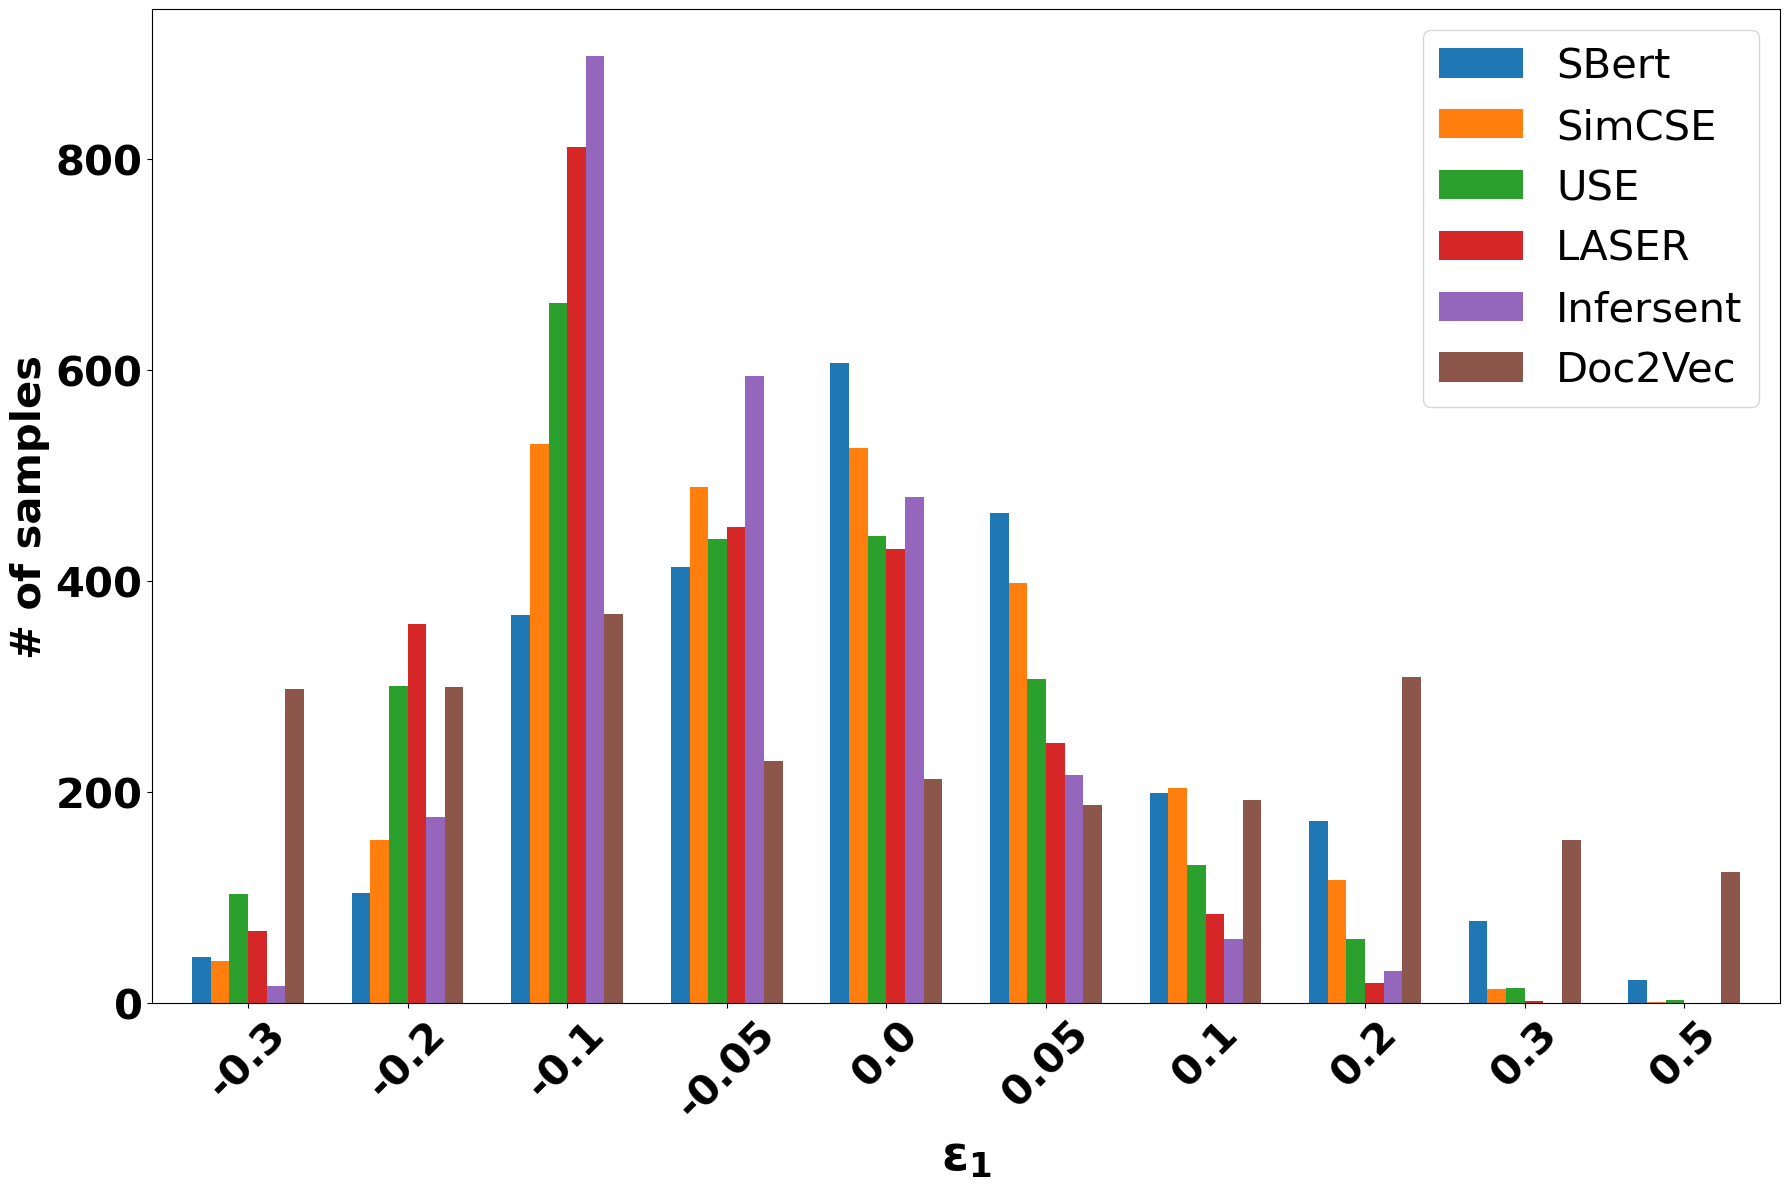

In [96]:
plot_counts_check(df_anto_qqp_n1,task="Antonyms_QQP",n=1,save=False)

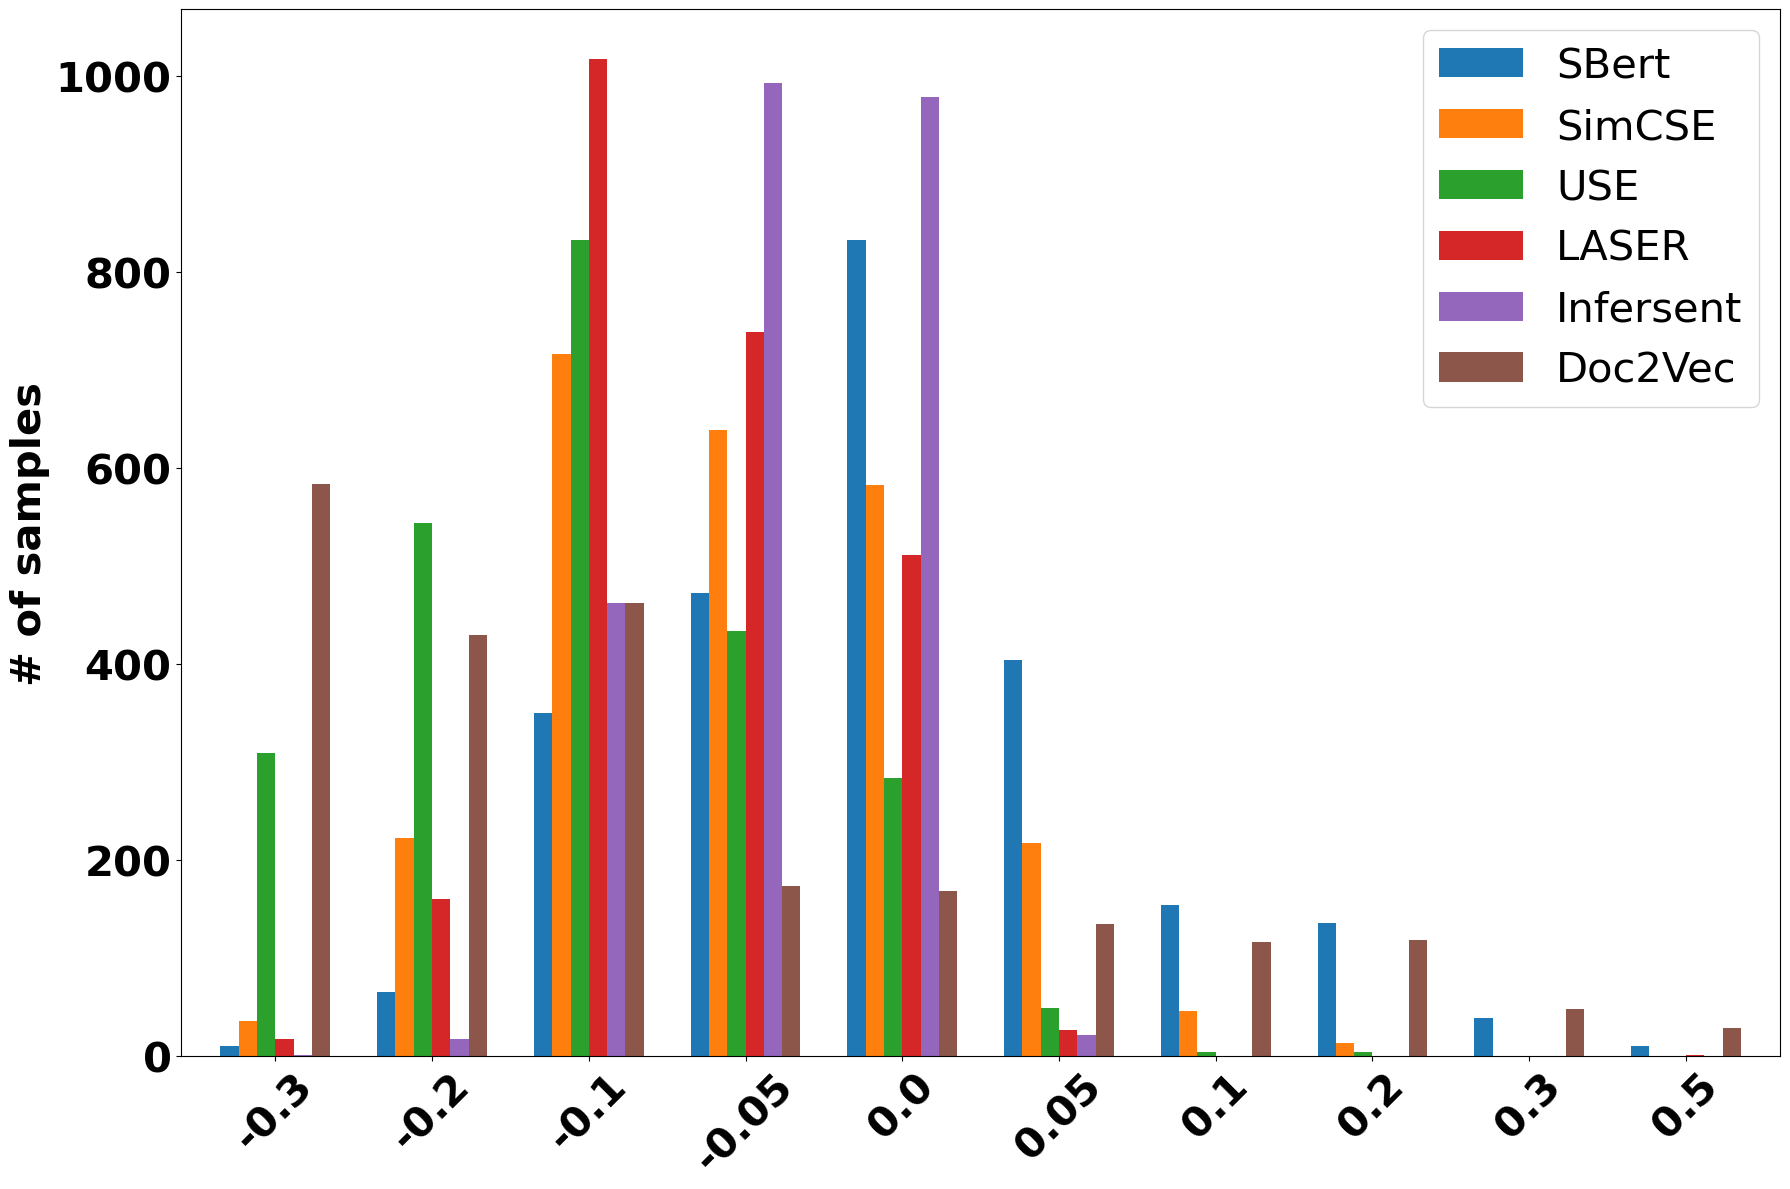

In [97]:
plot_counts_check(df_anto_mrpc_n1,task="Antonym_MRPC",n=1,save=False)

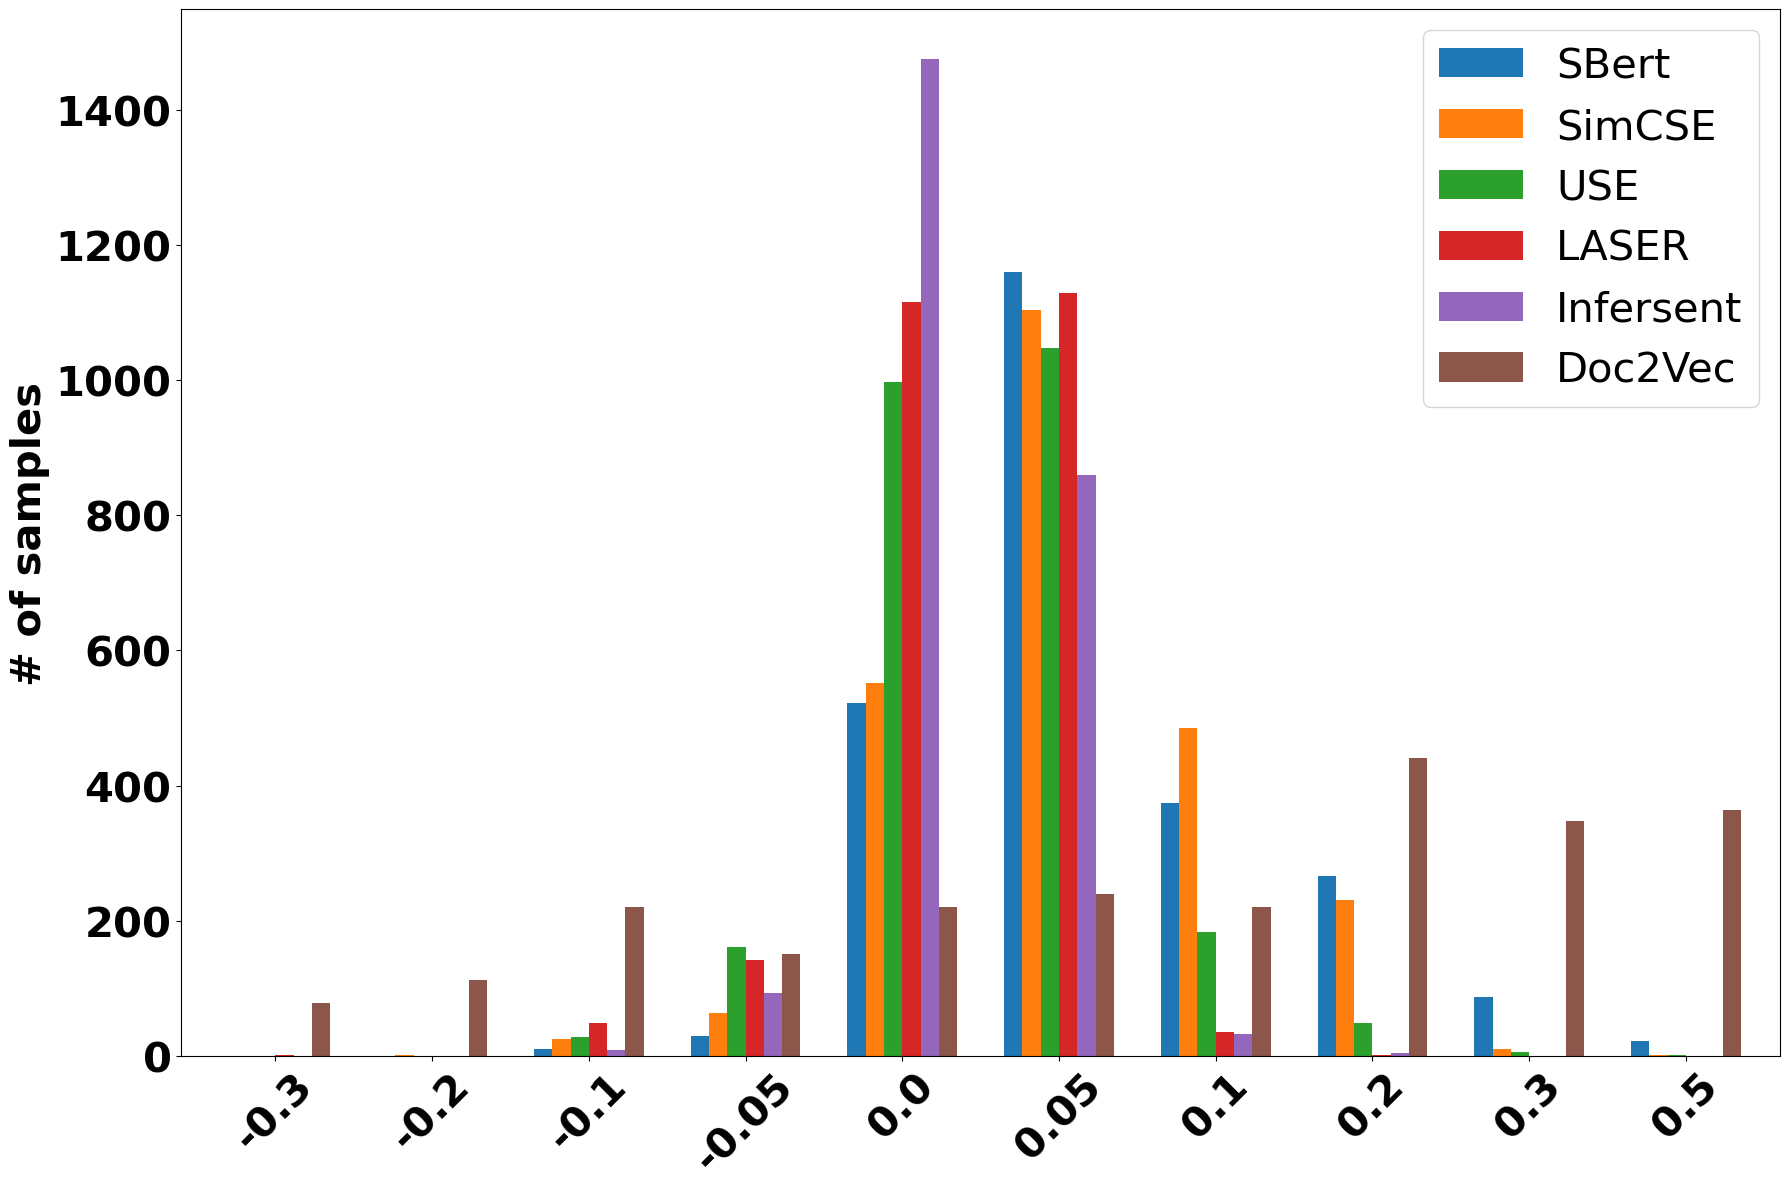

In [98]:
plot_counts_check(df_anto_paws_n1,task="Antonym_PAWS",n=1,save=False)

# Synonym Avg.

In [104]:
la_syn_q = pd.read_csv("../llm_results/llama2_syn_QQp.csv")
la_syn_p = pd.read_csv("../llm_results/llama2_syn_paws.csv")
la_syn_m = pd.read_csv("../llm_results/llama2_syn_mrpc.csv")


In [107]:
print("QQP_n1",la_syn_q.sim_org_s1.mean())
print("PAWS_n1",la_syn_p.sim_org_s1.mean())
print("MRPC_n1",la_syn_m.sim_org_s1.mean())

print("*****************")

print("QQP_n2",la_syn_q.sim_org_s2.mean())
print("PAWS_n2",la_syn_p.sim_org_s2.mean())
print("MRPC_n2",la_syn_m.sim_org_s2.mean())

print("*****************")


print("QQP_n3",la_syn_q.sim_org_s3.mean())
print("PAWS_n3",la_syn_p.sim_org_s3.mean())
print("MRPC_n3",la_syn_m.sim_org_s3.mean())


QQP_n1 0.9129429657757282
PAWS_n1 0.9535799686738423
MRPC_n1 0.9546131697893143
*****************
QQP_n2 0.8104817023138915
PAWS_n2 0.892253439273153
MRPC_n2 0.8869269763486726
*****************
QQP_n3 0.7166356910854977
PAWS_n3 0.8201575006251889
MRPC_n3 0.8009310285704476


# Blanco-Negation

In [2]:
import pandas as pd

# bloom
bloom_neg = pd.read_csv("/home/yash/Probing-Sentence-Encoder/llm_results/blanco/blanco_bloom_llm.csv")
llama_neg = pd.read_csv("/home/yash/Probing-Sentence-Encoder/llm_results/blanco/blanco_llama2_llm.csv")
# gpt3_neg = pd.read_csv("/home/yash/Probing-Sentence-Encoder/llm_results/blanco/blanco_gpt3_llm.csv")
gptneo_neg = pd.read_csv("/home/yash/Probing-Sentence-Encoder/llm_results/blanco/blanco_gptneo_llm.csv")
sbert_neg = pd.read_csv("/home/yash/Probing-Sentence-Encoder/llm_results/blanco/blanco_sbert_llm.csv")



In [3]:
bloom_neg.head()

,Unnamed: 0,Unnamed: 0.1,sentence,affirm_sentence,bloom_sim
0,0,0,Even several records are preserved from King E...,Even more records survive from King Edward 's ...,0.999335
1,1,1,She only half - heartedly supported a number o...,She just supported half - hearted some little ...,0.999408
2,2,2,But it was clear that the central geopolitical...,"However , it was clear that Bulgaria 's centra...",0.999517
3,3,3,Vale tudo began in the 1920s and became gained...,Vale Tudo began in 1920 and became known via t...,0.999198
4,4,4,"A day later Spencer - Smith died , utterly wor...","The next day , Spencer - Smith , completely de...",0.999360


In [4]:
bloom_neg.bloom_sim.mean()

0.9984847662013531

In [5]:
llama_neg.llama2_sim.mean()

0.872406348208047

In [6]:
gptneo_neg.gptneo_sim.mean()

0.9511825005006823

In [7]:
sbert_neg.sbert_sim.mean()

0.7952244302918652

In [8]:
llama_neg.head()

,Unnamed: 0,Unnamed: 0.1,sentence,affirm_sentence,llama2_sim
0,0,0,Even several records are preserved from King E...,Even more records survive from King Edward 's ...,0.677300
1,1,1,She only half - heartedly supported a number o...,She just supported half - hearted some little ...,0.609505
2,2,2,But it was clear that the central geopolitical...,"However , it was clear that Bulgaria 's centra...",0.892919
3,3,3,Vale tudo began in the 1920s and became gained...,Vale Tudo began in 1920 and became known via t...,0.920826
4,4,4,"A day later Spencer - Smith died , utterly wor...","The next day , Spencer - Smith , completely de...",0.914707


In [12]:
print(llama_neg.affirm_sentence.iloc[39])

' We have seen that Spain has been opposing even the recognition of Kosovo , for instance .


# Paraphrasing_ LLM + Blanco

In [2]:
import pandas as pd

In [28]:
# df1 = pd.read_csv("../llm_results/chatgpt_paraphrase_paws_wiki.csv")
# df2 = pd.read_csv("../llm_results/chatgpt_paraphrase_qoura.csv.csv")

# df1 = pd.read_csv("../llm_results/llama2_paraphrase_paws_wiki.csv")
# df2 = pd.read_csv("../llm_results/llama2_paraphrase_qoura.csv")
# df3 = pd.read_csv("../llm_results/llama2_paraphrase_mrpc.csv")

# df1 = pd.read_csv("../llm_results/bloom_model_paraphrase_paws_wiki.csv")
# df2 = pd.read_csv("../llm_results/bloom_model_paraphrase_qoura.csv")
# df3 = pd.read_csv("../llm_results/bloom_model_paraphrase_mrpc.csv.csv")

df1 = pd.read_csv("../llm_results/GPTNeo_paraphrase_paws_wiki.csv")
df2 = pd.read_csv("../llm_results/GPTNeo_paraphrase_qoura.csv")
df3 = pd.read_csv("../llm_results/GPTNeo_paraphrase_mrpc.csv.csv")

print("mrpc label:1", df3[df3.label==1]["sim"].mean())
print("mrpc label:0", df3[df3.label==0]["sim"].mean())
print("diff :",df3[df3.label==1]["sim"].mean() - df3[df3.label==0]["sim"].mean() )

print("**********************")
print("qqp label:1", df2[df2.label==1]["sim"].mean())
print("qqp label:0", df2[df2.label==0]["sim"].mean())
print("diff :",df2[df2.label==1]["sim"].mean() - df2[df2.label==0]["sim"].mean() )
print("**********************")

print("paws label:1", df1[df1.label==1]["sim"].mean())
print("paws label:0", df1[df1.label==0]["sim"].mean())
print("diff :",df1[df1.label==1]["sim"].mean() - df1[df1.label==0]["sim"].mean() )

mrpc label:1 0.9633805488018605
mrpc label:0 0.9449954123998098
diff : 0.01838513640205075
**********************
qqp label:1 0.9506859368609014
qqp label:0 0.8942433090210611
diff : 0.05644262783984033
**********************
paws label:1 0.9853181480227359
paws label:0 0.9791819945303136
diff : 0.006136153492422247


mrpc label:1 0.9162740883513044
mrpc label:0 0.8750871756368346
diff : 0.04118691271446984
**********************
qqp label:1 0.8821447585420362
qqp label:0 0.7702352709177004
diff : 0.11190948762433583
**********************
paws label:1 0.9583377810829443
paws label:0 0.9423891698738542
diff : 0.01594861120909008


qqp label:1 0.949766614689357
qqp label:0 0.8610019183654896


In [12]:
df1[df1.label==0].iloc[0]["sentence1"]

'In Paris , in October 1560 , he secretly met the English ambassador , Nicolas Throckmorton , asking him for a passport to return to England through Scotland .'

In [13]:
df1[df1.label==0].iloc[0]["sentence2"]


'In October 1560 , he secretly met with the English ambassador , Nicolas Throckmorton , in Paris , and asked him for a passport to return to Scotland through England .'

In [1]:
import pandas as pd

In [10]:
mn = "infersent"
mrpc_pos = pd.read_csv(f"/home/yash/Probing-Sentence-Encoder/llm_results/paraphrase_ablation_results/classic_models/mrpc_{mn}_pos.csv")
mrpc_neg = pd.read_csv(f"/home/yash/Probing-Sentence-Encoder/llm_results/paraphrase_ablation_results/classic_models/mrpc_{mn}_neg.csv")

paws_pos = pd.read_csv(f"/home/yash/Probing-Sentence-Encoder/llm_results/paraphrase_ablation_results/classic_models/paws_{mn}_pos.csv")
paws_neg = pd.read_csv(f"/home/yash/Probing-Sentence-Encoder/llm_results/paraphrase_ablation_results/classic_models/paws_{mn}_neg.csv")

qqp_pos = pd.read_csv(f"/home/yash/Probing-Sentence-Encoder/llm_results/paraphrase_ablation_results/classic_models/qqp_{mn}_pos.csv")
qqp_neg = pd.read_csv(f"/home/yash/Probing-Sentence-Encoder/llm_results/paraphrase_ablation_results/classic_models/qqp_{mn}_neg.csv")

In [11]:
print("mrpc pos", mrpc_pos.sim.mean())
print("mrpc neg", mrpc_neg.sim.mean())
print("paws pos", paws_pos.sim.mean())
print("paws neg", paws_neg.sim.mean())
print("qqp pos", qqp_pos.sim.mean())
print("qqp neg", qqp_neg.sim.mean())


mrpc pos 0.6659582496689227
mrpc neg 0.6516469967624849
paws pos 0.6245065972702519
paws neg 0.627959042909152
qqp pos 0.5483131925684782
qqp neg 0.5452124054097811


In [12]:
mrpc_pos = pd.read_csv(f"/home/yash/Probing-Sentence-Encoder/llm_results/paraphrase_ablation_results/classic_models/use_mrpc_pos.csv")
mrpc_neg = pd.read_csv(f"/home/yash/Probing-Sentence-Encoder/llm_results/paraphrase_ablation_results/classic_models/use_mrpc_neg.csv")

paws_pos = pd.read_csv(f"/home/yash/Probing-Sentence-Encoder/llm_results/paraphrase_ablation_results/classic_models/use_paws_pos.csv")
paws_neg = pd.read_csv(f"/home/yash/Probing-Sentence-Encoder/llm_results/paraphrase_ablation_results/classic_models/use_paws_neg.csv")

qqp_pos = pd.read_csv(f"/home/yash/Probing-Sentence-Encoder/llm_results/paraphrase_ablation_results/classic_models/use_qqp_pos.csv")
qqp_neg = pd.read_csv(f"/home/yash/Probing-Sentence-Encoder/llm_results/paraphrase_ablation_results/classic_models/use_qqp_neg.csv")

In [14]:
print("mrpc pos", mrpc_pos.use_sim.mean())
print("mrpc neg", mrpc_neg.use_sim.mean())
print("paws pos", paws_pos.use_sim.mean())
print("paws neg", paws_neg.use_sim.mean())
print("qqp pos", qqp_pos.use_sim.mean())
print("qqp neg", qqp_neg.use_sim.mean())


mrpc pos 0.06099835315625002
mrpc neg 0.07855821348437499
paws pos 0.0703848199375
paws neg 0.071832648234375
qqp pos 0.165567043453125
qqp neg 0.14297821295312502
